# EDA & Hypothesis Testing

What makes a prospect a pick? I've collected all this data but what will really matter when predicting a round a prospect will be picked in. I want to model based for each of the following position groups:

        * Quarterbacks (QBs)
        * Receivers & Running Backs (Receivers)
        * Offensive Line (OffensiveLine)
        * Linebackers (LBs)
        * Defensive Backs (DefensiveBacks)
        * Special Teams (SpecialTeams)
        
Before I start modeling, I want to check out my data and get to know what will matter when trying to nail down just which round a prospect will be selected in. I start by visualizing the distribution of my outcome in a given position group. From there I pass each variable I think I may want in my model.

In this notebook, I look into my Defensive Backs data.

First things first, I need to load in my models.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import scipy

import warnings
warnings.simplefilter('ignore')

In [94]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [95]:
df = pd.read_pickle('../../mod5project/pickle_files/cleaned_df')

In [96]:
df.head()

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [98]:
df[df['PlayerName'] == 'Dee Milliner']

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
3279,Dee Milliner,CB,Alabama,2013,72,201,4.37,36.00,7.24,122.00,6.95,4.32,New York Jets,1st,9th pick,2013,0.00,34.00,20.00,54.00,4.00,1.50,0.00,0.00,0.00,0.00,22.00,1.00,17.00,0.00,1.00,inf,inf,inf,inf,inf,0.00,0.00,0.00,inf,inf,inf,0.00,inf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,0,DefensiveBacks


## Functions

This is a lot of repetition so I build function to streamline the process over the 6 groups I need to investigate.

In [56]:
def position_family_df(position_family, df):
    """
    This funciton will filter for the specific position group - or family - I'm interested in for a 
    particular notebook. 
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        
    Returns:
        dataframe: filtered dataframe
        
    """
    dataframe = df[df['Pos'] == position_family]
    return dataframe

In [57]:
def plot_outcomes(position_family, df):
    """
    This function returns the count for each round a given position group has and graphs it. Along with the count,
    it will also print the normalized count -- % to total -- as a point of comparison.
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
    
    Returns:
        Dataframe shape, value counts for each round and the countplot for the distribution
        
    """
    dataframe = df
    print(position_family + ' Count: ')
    print('-'*40)
    print(position_family + ' Shape: ', dataframe.shape)
    print(dataframe['Round'].value_counts())
    print(round(dataframe['Round'].value_counts(normalize=True), 2))
    order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']
    plt.figure(figsize=(10, 6))
    sns.countplot(dataframe['Round'],order=order, palette='bright');
    plt.title(position_family + ' Round Distribution')
    plt.savefig('../../mod5project/images/' + position_family + '_round_distro')
    plt.show()

In [58]:
def plot_stats(position_family, df, lst):
    """
    The function returns the descriptive statistics for each item in a list. The list in question is a set of 
    feature I'm parsing through to determine if they're statistically significant. I want to first check their 
    distribution by plotting each feature's boxplot.
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        lst: feature list
        
    Returns:
        Prints descriptive statistics, mean by Round for the feature and plots the distribution boxplot.
    
    """
    for i in lst:
        dataframe = df
        order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']
        print(position_family + ' ' + i + ' Summary:')
        print(dataframe[i].describe())
        print('-' * 40)
        print(position_family + ' ' + i + ' by Round')
        print(dataframe[['Round', i]].groupby(['Round']).mean())
        plt.figure(figsize = (10,6))
        plt.title(position_family + ' ' + i + ' Distribution')
        sns.boxplot(y=dataframe[i], x=dataframe['Round'], order=order)
        plt.savefig('../../mod5project/images/' + position_family + '_' + i + '_Distro')
        plt.show()

In [59]:
def anova_tukey(position_family, df, feature):
    """
    This function runs the ANOVA test checking for significance between a given feature and the output variable along
    with the 
    
    Parameters:
        position_family: string, value from 'Pos' column created in the data preprocessing notebook
        df: original dataframe that read in cleaned data
        feature: feature being tested  
        
    Returns:
        Prints ANOVA test summary and Tukey-MC analysis
    
    """
    dataframe = df
    anova_rounds = ols(feature + '~Round', data=dataframe).fit()
    anova_rounds
    anova_table = sm.stats.anova_lm(anova_rounds, type=2)
    print(anova_table)
    print('')
    mc = MultiComparison(dataframe[feature], dataframe['Round'])
    mc_results = mc.tukeyhsd()
    print(mc_results.summary())

## EDA & Hypothesis Testing

First things first, I need to check the distribution of my outcome. Then I can start hypothesis testing.

In [86]:
df = position_family_df('DefensiveBacks', df)
df[df['Defense_Games'] == 0]

,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
523,Rod Babers,CB,Texas,2003,69,192,4.43,37.00,15.00,127.00,6.83,4.07,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60,9,DefensiveBacks
1035,Ben Emanuel,FS,UCLA,2005,75,213,4.57,17.87,21.00,60.21,3.51,2.10,Carolina Panthers,5th,171st pick,2005,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,DefensiveBacks
1176,Marquis Weeks,SS,Virginia,2005,70,216,4.56,36.50,23.00,120.00,7.46,3.89,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,1.00,0.00,0.00,6.00,0.00,0.08,0.00,0.00,0.50,60,10,DefensiveBacks
2527,Walter Thurmond,CB,Oregon,2010,71,189,4.53,18.00,7.24,60.95,3.47,2.08,Seattle Seahawks,4th,111th pick,2010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

Defensive Backs Count: 
----------------------------------------
Defensive Backs Shape:  (1101, 121)
Not Drafted    329
2nd            129
3rd            126
4th            125
1st            120
5th            114
6th             87
7th             71
Name: Round, dtype: int64
Not Drafted   0.30
2nd           0.12
3rd           0.11
4th           0.11
1st           0.11
5th           0.10
6th           0.08
7th           0.06
Name: Round, dtype: float64


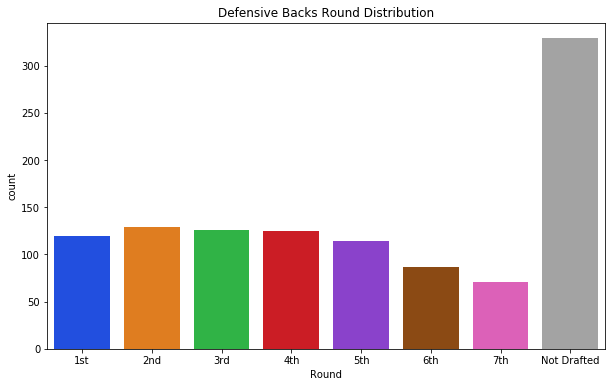

In [61]:
plot_outcomes('Defensive Backs', df)

### Height & Weight

In [62]:
height_weight = ['Height', 'Weight']

Defensive Backs Height Summary:
count   1101.00
mean      71.76
std        1.78
min       67.00
25%       71.00
50%       72.00
75%       73.00
max       78.00
Name: Height, dtype: float64
----------------------------------------
Defensive Backs Height by Round
             Height
Round              
1st           71.86
2nd           71.98
3rd           71.84
4th           71.74
5th           71.82
6th           71.61
7th           71.94
Not Drafted   71.60


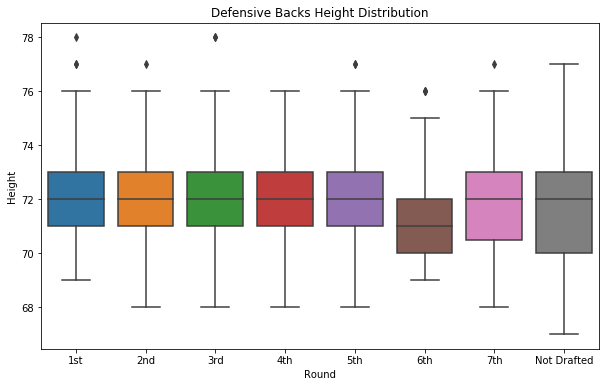

Defensive Backs Weight Summary:
count   1101.00
mean     201.40
std       15.21
min      169.00
25%      192.00
50%      199.00
75%      209.00
max      271.00
Name: Weight, dtype: float64
----------------------------------------
Defensive Backs Weight by Round
             Weight
Round              
1st          201.92
2nd          203.24
3rd          200.43
4th          202.05
5th          201.57
6th          200.66
7th          203.69
Not Drafted  200.25


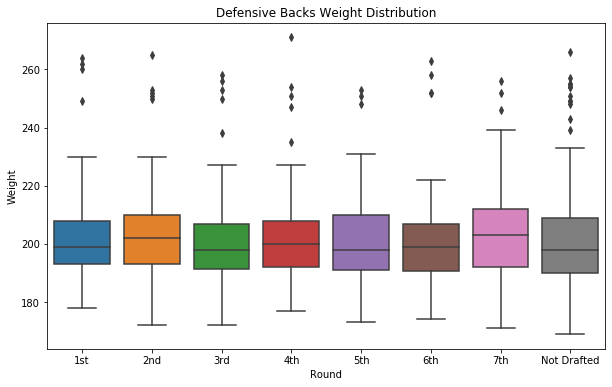

In [63]:
plot_stats('Defensive Backs', df, height_weight)

#### Height

H0: The height of players drafted are the same between rounds.

H1: The heigh of players drafted are not the same between rounds.

In [65]:
anova_tukey('Defensive Backs', df, 'Height')

              df  sum_sq  mean_sq    F  PR(>F)
Round       7.00   21.36     3.05 0.96    0.46
Residual 1093.00 3456.81     3.16  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.1184    0.9 -0.5665 0.8034  False
   1st         3rd  -0.0171    0.9 -0.7059 0.6718  False
   1st         4th  -0.1143    0.9 -0.8045 0.5759  False
   1st         5th  -0.0425    0.9 -0.7489 0.6638  False
   1st         6th  -0.2491    0.9 -1.0096 0.5113  False
   1st         7th   0.0853    0.9 -0.7233 0.8939  False
   1st Not Drafted  -0.2595 0.8608 -0.8355 0.3164  False
   2nd         3rd  -0.1355    0.9 -0.8119  0.541  False
   2nd         4th  -0.2327    0.9 -0.9106 0.4451  False
   2nd         5th   -0.161    0.9 -0.8552 0.5333  False
   2nd         6th  -0.3675 0.7885 -1.1168 0.3817  False
   2nd         7th  -0.0331    0.9 -0.8311  0.765  False
   

Based on the test above, Height doesn't play a role in decifering between draft rounds. I fail to reject the null hypothesis. Height can be excluded when I pass Defensive Backs through my models.

#### Weight

H0: The weight of players drafted are the same between rounds.

H1: The weight of players drafted are not the same between rounds.

In [66]:
anova_tukey('Defensive Backs', df, 'Weight')

              df    sum_sq  mean_sq    F  PR(>F)
Round       7.00   1499.92   214.27 0.93    0.49
Residual 1093.00 253089.63   231.56  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd   1.3236    0.9 -4.5371  7.1844  False
   1st         3rd  -1.4881    0.9 -7.3824  4.4062  False
   1st         4th   0.1313    0.9 -5.7744  6.0371  False
   1st         5th  -0.3465    0.9 -6.3902  5.6972  False
   1st         6th  -1.2615    0.9 -7.7684  5.2454  False
   1st         7th   1.7735    0.9 -5.1454  8.6923  False
   1st Not Drafted  -1.6674    0.9 -6.5954  3.2606  False
   2nd         3rd  -2.8117 0.7972 -8.5997  2.9763  False
   2nd         4th  -1.1923    0.9  -6.992  4.6074  False
   2nd         5th  -1.6701    0.9 -7.6102    4.27  False
   2nd         6th  -2.5851    0.9 -8.9959  3.8256  False
   2nd         7th   0.4498    0.9 -6.37

Again I can not reject the null hypothesis. Weight is not an indication for draft round pick.

### Combine Stats

First, I want to look at the descriptive statistics for the combine results.

In [67]:
combine_stats = ['_40yd', 'Vertical', 'Bench', 'BroadJump', '_3Cone', 'Shuttle']
df[combine_stats].describe()

,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,4.42,32.09,14.12,109.11,5.51,3.34
std,0.49,7.70,5.23,24.86,1.73,1.03
min,2.23,16.99,2.00,59.47,3.36,2.08
25%,4.44,31.00,9.00,113.00,3.47,2.10
50%,4.52,34.50,14.00,119.00,6.73,4.03
75%,4.59,37.00,18.00,124.00,7.00,4.20
max,5.02,46.00,31.00,147.00,7.78,4.76


Defensive Backs _40yd Summary:
count   1101.00
mean       4.42
std        0.49
min        2.23
25%        4.44
50%        4.52
75%        4.59
max        5.02
Name: _40yd, dtype: float64
----------------------------------------
Defensive Backs _40yd by Round
             _40yd
Round             
1st           4.41
2nd           4.39
3rd           4.38
4th           4.33
5th           4.39
6th           4.41
7th           4.45
Not Drafted   4.49


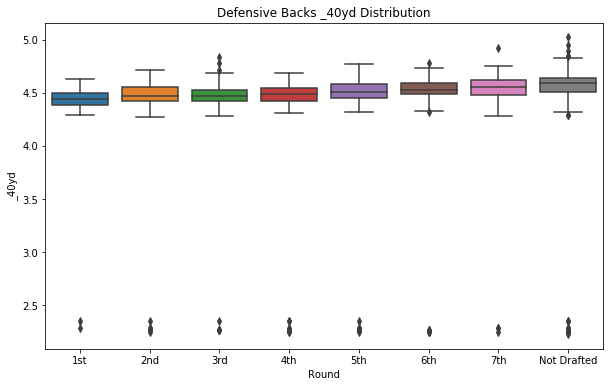

Defensive Backs Vertical Summary:
count   1101.00
mean      32.09
std        7.70
min       16.99
25%       31.00
50%       34.50
75%       37.00
max       46.00
Name: Vertical, dtype: float64
----------------------------------------
Defensive Backs Vertical by Round
             Vertical
Round                
1st             32.03
2nd             32.39
3rd             33.03
4th             32.37
5th             32.46
6th             30.13
7th             32.87
Not Drafted     31.75


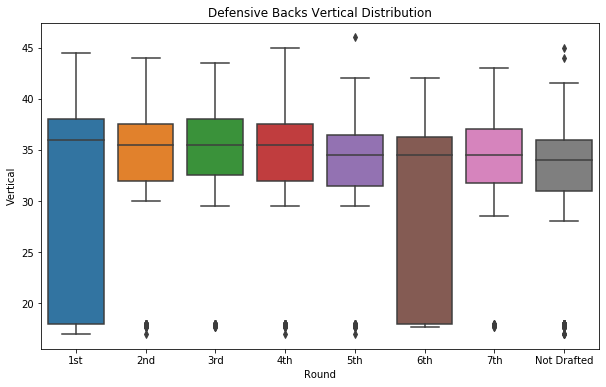

Defensive Backs Bench Summary:
count   1101.00
mean      14.12
std        5.23
min        2.00
25%        9.00
50%       14.00
75%       18.00
max       31.00
Name: Bench, dtype: float64
----------------------------------------
Defensive Backs Bench by Round
             Bench
Round             
1st          14.03
2nd          14.08
3rd          14.06
4th          14.66
5th          14.58
6th          14.48
7th          14.68
Not Drafted  13.61


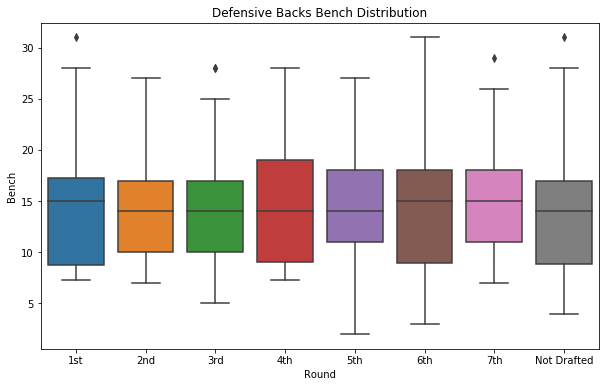

Defensive Backs BroadJump Summary:
count   1101.00
mean     109.11
std       24.86
min       59.47
25%      113.00
50%      119.00
75%      124.00
max      147.00
Name: BroadJump, dtype: float64
----------------------------------------
Defensive Backs BroadJump by Round
             BroadJump
Round                 
1st             109.91
2nd             111.01
3rd             110.62
4th             108.35
5th             110.62
6th             102.85
7th             111.50
Not Drafted     108.40


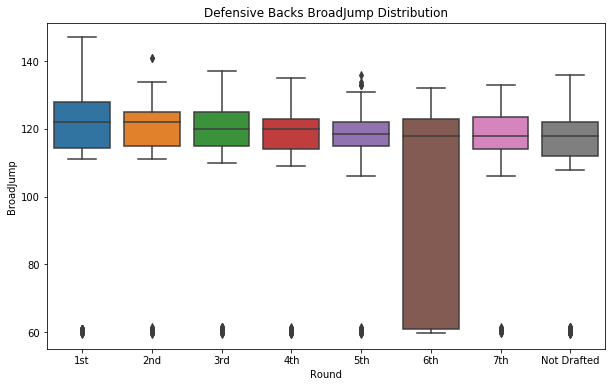

Defensive Backs _3Cone Summary:
count   1101.00
mean       5.51
std        1.73
min        3.36
25%        3.47
50%        6.73
75%        7.00
max        7.78
Name: _3Cone, dtype: float64
----------------------------------------
Defensive Backs _3Cone by Round
             _3Cone
Round              
1st            5.15
2nd            5.45
3rd            5.61
4th            5.50
5th            5.43
6th            5.50
7th            6.02
Not Drafted    5.56


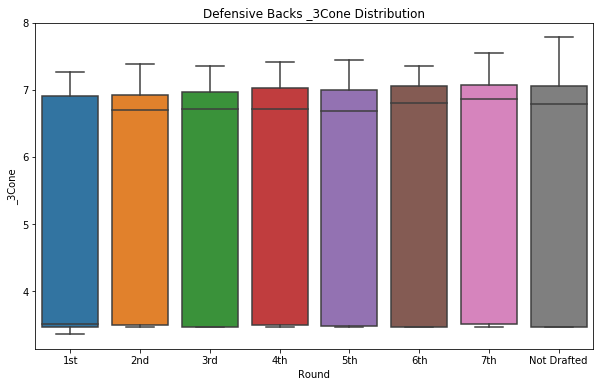

Defensive Backs Shuttle Summary:
count   1101.00
mean       3.34
std        1.03
min        2.08
25%        2.10
50%        4.03
75%        4.20
max        4.76
Name: Shuttle, dtype: float64
----------------------------------------
Defensive Backs Shuttle by Round
             Shuttle
Round               
1st             3.08
2nd             3.25
3rd             3.40
4th             3.38
5th             3.34
6th             3.31
7th             3.50
Not Drafted     3.40


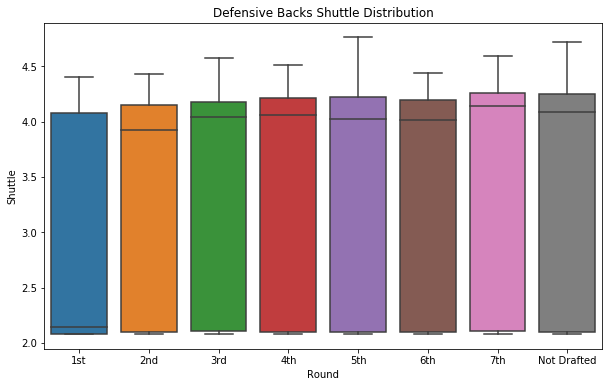

In [68]:
plot_stats('Defensive Backs', df, combine_stats)

From the graphs, it doesn't look like the combine results will be super telling for predicting draft rounds. I'll test each using an ANOVA & Tukey-MC comparison test. 

#### 40yd Dash

H0: The average 40yd dash is the same among the different draft picks.

H1: The average 40yd dash is not the same among the different draft picks.

#### Vertical

H0: The average vertical is the same among the different draft picks.

H1: The average vertical is not the same among the different draft picks.

#### Bench Press

H0: The average bench press is the same among the different draft picks.

H1: The average bench press is not the same among the different draft picks.

#### Broad Jump

H0: The average broad jump is the same among the different draft picks.

H1: The average broad jump is not the same among the different draft picks.

#### 3 cone

H0: The average 3 cone is the same among the different draft picks.

H1: The average 3 cone is not the same among the different draft picks.

#### Shuttle

H0: The average shuttle is the same among the different draft picks.

H1: The average shuttle is not the same among the different draft picks.

In [69]:
for i in combine_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 60)

_40yd ANOVA Test:
----------------------------------------
              df  sum_sq  mean_sq    F  PR(>F)
Round       7.00    3.12     0.45 1.87    0.07
Residual 1093.00  259.64     0.24  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   -0.026    0.9 -0.2137 0.1617  False
   1st         3rd  -0.0292    0.9  -0.218 0.1596  False
   1st         4th  -0.0781    0.9 -0.2672 0.1111  False
   1st         5th   -0.022    0.9 -0.2156 0.1716  False
   1st         6th  -0.0015    0.9 -0.2099 0.2069  False
   1st         7th    0.041    0.9 -0.1806 0.2626  False
   1st Not Drafted   0.0793 0.7668 -0.0785 0.2372  False
   2nd         3rd  -0.0032    0.9 -0.1886 0.1822  False
   2nd         4th  -0.0521    0.9 -0.2379 0.1337  False
   2nd         5th    0.004    0.9 -0.1863 0.1943  False
   2nd         6th   0.0245    0.9 -0.1809 0.2298  False
 

              df  sum_sq  mean_sq    F  PR(>F)
Round       7.00   12.96     1.85 1.75    0.09
Residual 1093.00 1157.77     1.06  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.1669    0.9 -0.2295 0.5633  False
   1st         3rd   0.3183 0.2303 -0.0803  0.717  False
   1st         4th   0.3052 0.2835 -0.0942 0.7046  False
   1st         5th   0.2638 0.5082  -0.145 0.6726  False
   1st         6th   0.2286 0.7362 -0.2115 0.6687  False
   1st         7th   0.4236 0.1096 -0.0444 0.8915  False
   1st Not Drafted   0.3168 0.0767 -0.0166 0.6501  False
   2nd         3rd   0.1514    0.9   -0.24 0.5429  False
   2nd         4th   0.1383    0.9  -0.254 0.5306  False
   2nd         5th   0.0969    0.9 -0.3049 0.4986  False
   2nd         6th   0.0617    0.9 -0.3719 0.4953  False
   2nd         7th   0.2567 0.6704 -0.2052 0.7185  False
   

With the exception of 40yd dash and 3 cone, I can not reject the null hypothesis for these features. I will want to include 40yd dash & 3 cone since there is a difference between two of the rounds for each.

### College Stats - Passing

I want to look at the college stats like I did for the combine results. I split these features up based on the overarching theme - ie Passing, Rushing, Defense, Kicking, Punt Returning and Scoring. First up is Passing. If this position family doesn't have any observations, I will exclude said feature from my hypothesis testing and modeling.

In [70]:
passing_stats = ['Passing_Games', 'Completions', 'Pass_Attempts', 'Completion_Percent', 'Pass_Yards', 
                 'Pass_Yds_per_Attempt', 'Adj_Pass_Yds_per_Attempt', 'Pass_TDs', 'Pass_Interceptions', 'Passer_Rating', 
                 'CompletionsperGame', 'Pass_AttemptsperGame', 'Pass_YardsperGame', 'Pass_TDsperGame', 
                 'Pass_InterceptionsperGame']

In [71]:
df[passing_stats].describe()

,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,0.18,0.17,0.27,0.28,2.43,0.07,0.09,0.02,0.01,1.13,0.01,0.02,0.19,0.00,0.00
std,1.45,5.37,8.83,4.87,76.35,1.37,1.65,0.60,0.21,20.98,0.41,0.68,5.87,0.05,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14.00,178.00,293.00,100.00,2532.00,36.00,46.00,20.00,7.00,567.40,13.69,22.54,194.77,1.54,0.54


Based on the descriptive statistics, there are features I can exclude before I even begin. This makes sense for Defensive Backs. They don't typically take over for a QB. I've decided that anything with a mean less than 1 should be dropped from the list.

In [72]:
passing_stats = ['Pass_Yards', 'Passer_Rating']

Now I can view these stats. The shortened list makes it a lot easier to interpret these metrics.

Defensive Backs Pass_Yards Summary:
count   1101.00
mean       2.43
std       76.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max     2532.00
Name: Pass_Yards, dtype: float64
----------------------------------------
Defensive Backs Pass_Yards by Round
             Pass_Yards
Round                  
1st                0.00
2nd                0.33
3rd                0.57
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        7.77


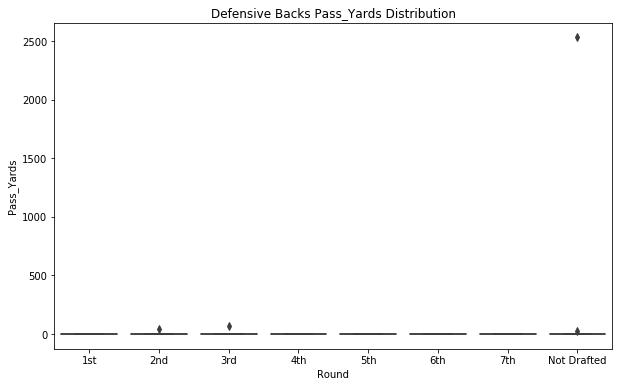

Defensive Backs Passer_Rating Summary:
count   1101.00
mean       1.13
std       20.98
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      567.40
Name: Passer_Rating, dtype: float64
----------------------------------------
Defensive Backs Passer_Rating by Round
             Passer_Rating
Round                     
1st                   0.00
2nd                   1.73
3rd                   4.50
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           1.38


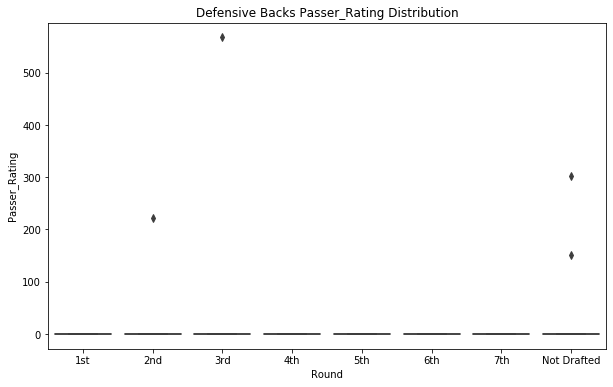

In [73]:
plot_stats('Defensive Backs', df, passing_stats)

#### Pass Yards

H0: The average passing yards is the same among the different draft picks.

H1: The average passing yards is not the same among the different draft picks.

#### Passer Rating

H0: The average passer rating is the same among the different draft picks.

H1: The average passer rating is not the same among the different draft picks.

In [74]:
for i in passing_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 40)

Pass_Yards ANOVA Test:
----------------------------------------
              df     sum_sq  mean_sq    F  PR(>F)
Round       7.00   13433.25  1919.04 0.33    0.94
Residual 1093.00 6398719.97  5854.27  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj  lower    upper  reject
---------------------------------------------------------
   1st         2nd   0.3333   0.9 -29.1354 29.8021  False
   1st         3rd   0.5714   0.9 -29.0659 30.2087  False
   1st         4th      0.0   0.9 -29.6951 29.6951  False
   1st         5th      0.0   0.9 -30.3887 30.3887  False
   1st         6th      0.0   0.9 -32.7177 32.7177  False
   1st         7th      0.0   0.9 -34.7892 34.7892  False
   1st Not Drafted    7.769   0.9 -17.0099 32.5479  False
   2nd         3rd   0.2381   0.9 -28.8649 29.3411  False
   2nd         4th  -0.3333   0.9 -29.4951 28.8285  False
   2nd         5th  -0.3333   0.9 -30.2011 29.5345  False
   2nd         6th  -0.3333   0

While Defensive Backs have racked up some passing stats, neither of these play a role in determining the draft round. I can not reject the null hypothesis on either and will exlcude all columns when running my model.

### College Stats - Rushing & Receiving

In [75]:
rushing_stats = ['Rush_Rec_Games', 'Rush_Attempts', 'Rush_Yds', 'Rush_Yds_per_Attempt', 'Rush_TDs', 
                 'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 'Rec_TDs', 'Plays_from_Scrimmage', 'Scrimmage_Yds',
                 'Scrimmage_Yds_per_Attempt', 'Scrimmage_TDs', 'Rush_AttemptsperGame', 'Rush_YdsperGame', 
                 'Rush_TDsperGame', 'ReceptionsperGame', 'Rec_YdsperGame', 'Rec_TDsperGame', 
                 'Plays_from_ScrimmageperGame', 'Scrimmage_YdsperGame', 'Scrimmage_TDsperGame']

In [76]:
df[rushing_stats].describe()

,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,1.07,0.31,1.95,0.29,0.02,0.02,0.24,0.06,0.00,0.33,2.19,0.30,0.02,0.03,0.16,0.00,0.00,0.02,0.00,0.03,0.18,0.00
std,3.46,5.01,26.89,2.55,0.38,0.28,4.90,1.11,0.09,5.10,28.38,2.58,0.40,0.39,2.11,0.03,0.02,0.37,0.01,0.40,2.23,0.03
min,0.00,0.00,-5.00,-3.00,0.00,0.00,-5.00,-5.00,0.00,0.00,-5.00,-3.00,0.00,0.00,-0.42,0.00,0.00,-0.83,0.00,0.00,-0.42,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,153.00,798.00,39.00,11.00,7.00,143.00,25.00,2.00,155.00,814.00,39.00,11.00,11.77,61.38,0.85,0.54,11.00,0.15,11.92,62.62,0.85


Like passing stats, I want to shorten the list of statistics I'm looking at for rushing. I'll cut out anything that has a mean below 1 once again.

In [77]:
rushing_stats = ['Rush_Yds', 'Scrimmage_Yds']

Defensive Backs Rush_Yds Summary:
count   1101.00
mean       1.95
std       26.89
min       -5.00
25%        0.00
50%        0.00
75%        0.00
max      798.00
Name: Rush_Yds, dtype: float64
----------------------------------------
Defensive Backs Rush_Yds by Round
             Rush_Yds
Round                
1st              1.89
2nd              2.33
3rd              0.05
4th              2.63
5th              0.64
6th              1.76
7th              0.54
Not Drafted      3.12


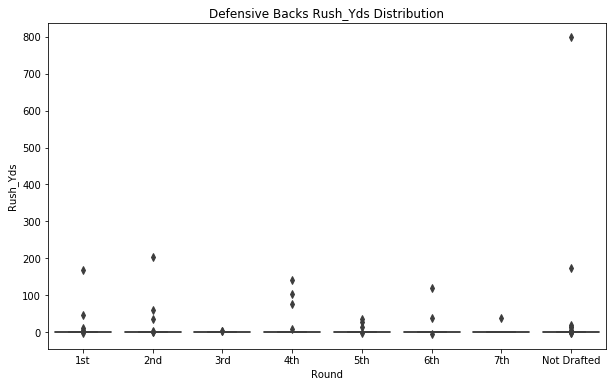

Defensive Backs Scrimmage_Yds Summary:
count   1101.00
mean       2.19
std       28.38
min       -5.00
25%        0.00
50%        0.00
75%        0.00
max      814.00
Name: Scrimmage_Yds, dtype: float64
----------------------------------------
Defensive Backs Scrimmage_Yds by Round
             Scrimmage_Yds
Round                     
1st                   1.92
2nd                   2.33
3rd                   0.07
4th                   4.40
5th                   0.64
6th                   1.76
7th                   0.54
Not Drafted           3.23


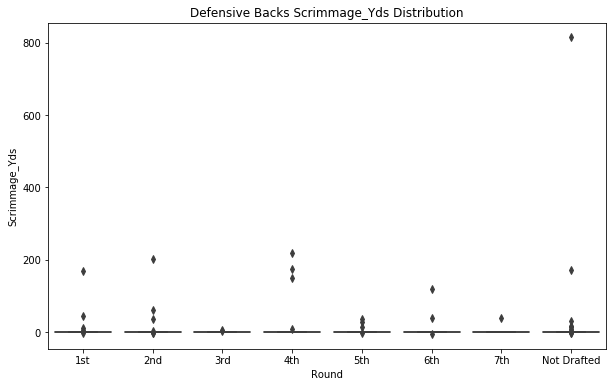

In [78]:
plot_stats('Defensive Backs', df, rushing_stats)

#### Rush Yards
H0: The average rushing yards is the same among the different draft picks.

H1: The average rushing yards is not the same among the different draft picks.

#### Scrimmage Yards Rating
H0: The average scrimamge yards is the same among the different draft picks.

H1: The average scrimmage yards is not the same among the different draft picks.

In [79]:
for i in rushing_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 40)

Rush_Yds ANOVA Test:
----------------------------------------
              df    sum_sq  mean_sq    F  PR(>F)
Round       7.00   1322.80   188.97 0.26    0.97
Residual 1093.00 794314.93   726.73  nan     nan

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj  lower    upper  reject
---------------------------------------------------------
   1st         2nd   0.4339   0.9  -9.9488 10.8166  False
   1st         3rd   -1.844   0.9 -12.2862  8.5981  False
   1st         4th   0.7403   0.9  -9.7221 11.2028  False
   1st         5th  -1.2513   0.9 -11.9582  9.4555  False
   1st         6th   -0.133   0.9 -11.6605 11.3944  False
   1st         7th  -1.3565   0.9 -13.6137 10.9008  False
   1st Not Drafted   1.2269   0.9  -7.5035  9.9572  False
   2nd         3rd   -2.278   0.9 -12.5318  7.9759  False
   2nd         4th   0.3064   0.9  -9.9682  10.581  False
   2nd         5th  -1.6852   0.9 -12.2086  8.8381  False
   2nd         6th   -0.567   0.9 -1

Again, I fail to reject the null hypothesis and I will exclude all rushing statistics from my model.

### College Stats - Defense

In [80]:
defense_stats = ['Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                 'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes', 
                 'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles', 
                 'Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                 'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                 'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                 'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame']

In [81]:
df[defense_stats].describe()

,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,11.89,28.88,14.60,43.48,2.67,0.65,2.36,33.18,12.06,0.25,2.77,0.21,2.01,0.07,0.34,inf,inf,inf,inf,inf,0.20,2.78,0.02,inf,inf,inf,0.01,inf
std,2.01,20.44,12.74,31.45,3.28,1.67,1.91,42.25,14.69,0.53,4.08,0.52,10.54,0.27,0.84,nan,nan,nan,nan,nan,0.17,3.64,0.05,nan,nan,nan,0.02,nan
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-10.00,-8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-8.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11.00,8.00,3.00,13.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.29,1.69,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,12.00,31.00,13.00,45.00,2.00,0.00,2.00,19.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,2.64,1.08,3.77,0.15,0.00,0.17,1.58,0.00,0.00,0.00,0.00,0.00,0.00
75%,13.00,44.00,23.00,66.00,4.00,1.00,3.00,49.00,19.00,0.00,5.00,0.00,0.00,0.00,0.00,3.50,1.85,5.38,0.32,0.08,0.29,4.10,0.00,0.44,0.00,0.00,0.00,0.00
max,15.00,87.00,75.00,136.00,26.50,17.00,14.00,280.00,100.00,4.00,23.00,3.00,111.00,2.00,7.00,inf,inf,inf,inf,inf,1.25,25.45,0.36,inf,inf,inf,0.17,inf


It makes sense that the defense statistics have a lot more data in them since this is a defense position! I want to inlcude all of these metrics for sure when I run my model.

Now I added per Game metrics off to the right. I will leave those out since they'll be captured when just looking at the total.

In [82]:
defense_stats = ['Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                 'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes', 
                 'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles']

Defensive Backs Defense_Games Summary:
count   1101.00
mean      11.89
std        2.01
min        0.00
25%       11.00
50%       12.00
75%       13.00
max       15.00
Name: Defense_Games, dtype: float64
----------------------------------------
Defensive Backs Defense_Games by Round
             Defense_Games
Round                     
1st                  11.93
2nd                  12.19
3rd                  11.89
4th                  12.06
5th                  11.93
6th                  11.40
7th                  11.93
Not Drafted          11.81


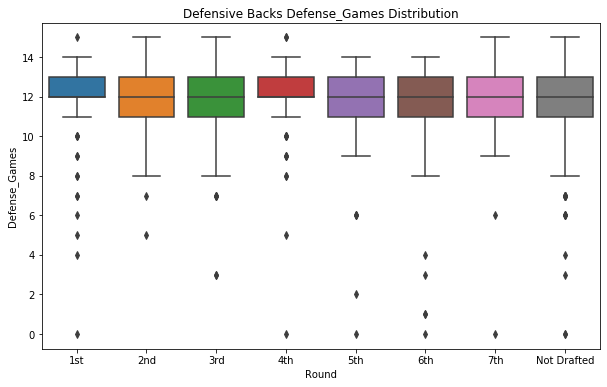

Defensive Backs Solo_Tackles Summary:
count   1101.00
mean      28.88
std       20.44
min        0.00
25%        8.00
50%       31.00
75%       44.00
max       87.00
Name: Solo_Tackles, dtype: float64
----------------------------------------
Defensive Backs Solo_Tackles by Round
             Solo_Tackles
Round                    
1st                 27.93
2nd                 30.31
3rd                 27.49
4th                 29.79
5th                 30.23
6th                 26.05
7th                 30.82
Not Drafted         28.71


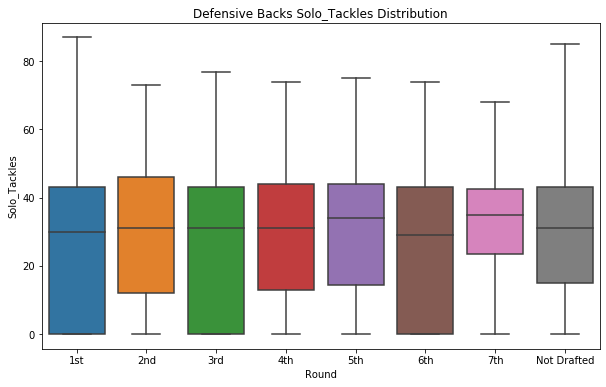

Defensive Backs Assisted_Tackles Summary:
count   1101.00
mean      14.60
std       12.74
min        0.00
25%        3.00
50%       13.00
75%       23.00
max       75.00
Name: Assisted_Tackles, dtype: float64
----------------------------------------
Defensive Backs Assisted_Tackles by Round
             Assisted_Tackles
Round                        
1st                     12.88
2nd                     15.15
3rd                     13.75
4th                     14.82
5th                     15.00
6th                     13.48
7th                     15.48
Not Drafted             15.22


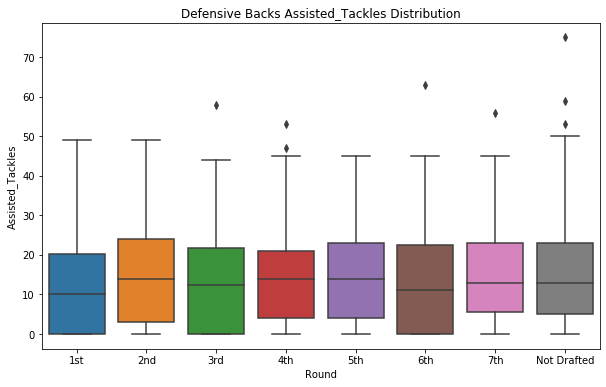

Defensive Backs Ttl_Tackles Summary:
count   1101.00
mean      43.48
std       31.45
min        0.00
25%       13.00
50%       45.00
75%       66.00
max      136.00
Name: Ttl_Tackles, dtype: float64
----------------------------------------
Defensive Backs Ttl_Tackles by Round
             Ttl_Tackles
Round                   
1st                40.80
2nd                45.46
3rd                41.25
4th                44.62
5th                45.23
6th                39.53
7th                46.30
Not Drafted        43.93


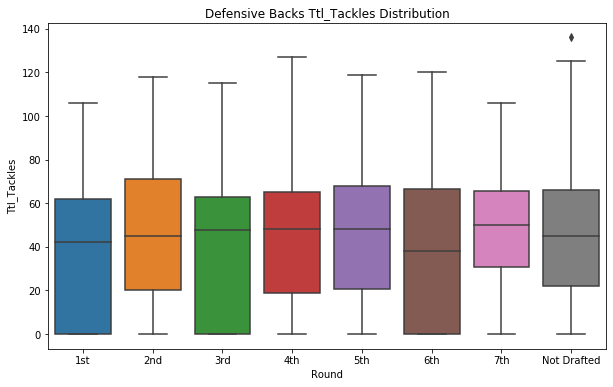

Defensive Backs Loss Summary:
count   1101.00
mean       2.67
std        3.28
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       26.50
Name: Loss, dtype: float64
----------------------------------------
Defensive Backs Loss by Round
             Loss
Round            
1st          3.06
2nd          2.59
3rd          2.67
4th          2.71
5th          2.86
6th          2.42
7th          3.08
Not Drafted  2.46


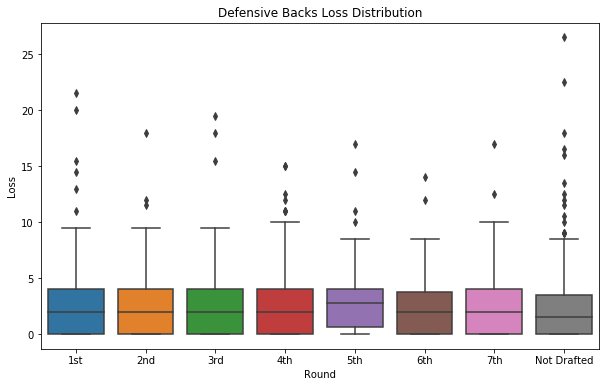

Defensive Backs Sacks Summary:
count   1101.00
mean       0.65
std        1.67
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       17.00
Name: Sacks, dtype: float64
----------------------------------------
Defensive Backs Sacks by Round
             Sacks
Round             
1st           0.82
2nd           0.71
3rd           0.59
4th           0.68
5th           0.56
6th           0.49
7th           0.83
Not Drafted   0.61


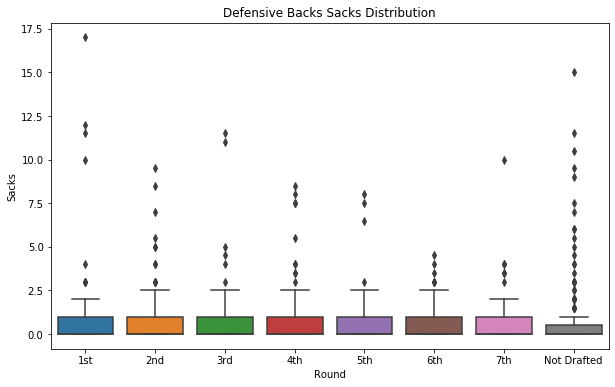

Defensive Backs Defensive_Interceptions Summary:
count   1101.00
mean       2.36
std        1.91
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       14.00
Name: Defensive_Interceptions, dtype: float64
----------------------------------------
Defensive Backs Defensive_Interceptions by Round
             Defensive_Interceptions
Round                               
1st                             2.73
2nd                             2.97
3rd                             2.42
4th                             2.36
5th                             2.44
6th                             2.32
7th                             2.04
Not Drafted                     2.01


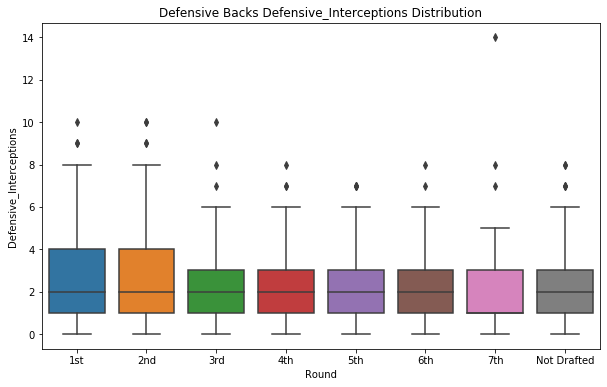

Defensive Backs Def_Int_Yds Summary:
count   1101.00
mean      33.18
std       42.25
min      -10.00
25%        0.00
50%       19.00
75%       49.00
max      280.00
Name: Def_Int_Yds, dtype: float64
----------------------------------------
Defensive Backs Def_Int_Yds by Round
             Def_Int_Yds
Round                   
1st                43.83
2nd                43.57
3rd                33.21
4th                32.83
5th                33.89
6th                23.92
7th                34.75
Not Drafted        27.22


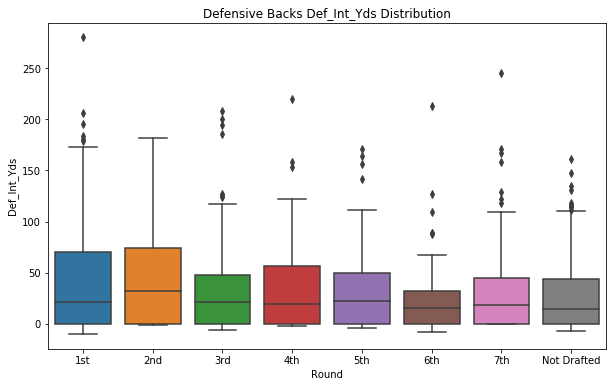

Defensive Backs Yds_per_Int Summary:
count   1101.00
mean      12.06
std       14.69
min       -8.00
25%        0.00
50%        8.00
75%       19.00
max      100.00
Name: Yds_per_Int, dtype: float64
----------------------------------------
Defensive Backs Yds_per_Int by Round
             Yds_per_Int
Round                   
1st                13.27
2nd                12.95
3rd                12.54
4th                11.52
5th                13.09
6th                 9.29
7th                12.06
Not Drafted        11.66


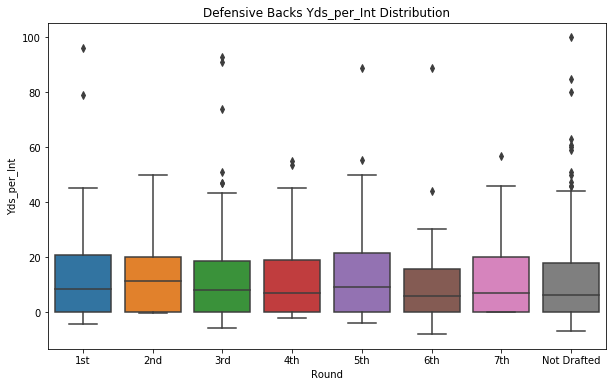

Defensive Backs Pick_6 Summary:
count   1101.00
mean       0.25
std        0.53
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        4.00
Name: Pick_6, dtype: float64
----------------------------------------
Defensive Backs Pick_6 by Round
             Pick_6
Round              
1st            0.40
2nd            0.36
3rd            0.23
4th            0.27
5th            0.25
6th            0.14
7th            0.24
Not Drafted    0.18


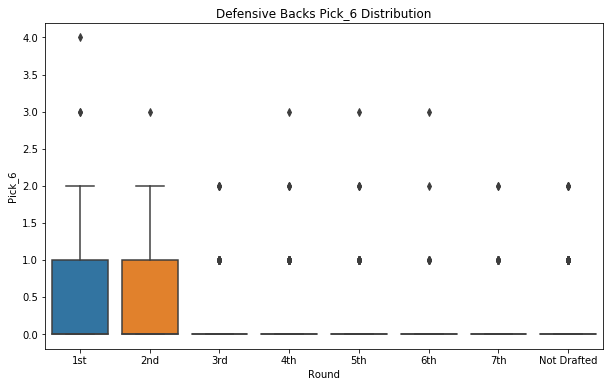

Defensive Backs Defended_Passes Summary:
count   1101.00
mean       2.77
std        4.08
min        0.00
25%        0.00
50%        0.00
75%        5.00
max       23.00
Name: Defended_Passes, dtype: float64
----------------------------------------
Defensive Backs Defended_Passes by Round
             Defended_Passes
Round                       
1st                     3.39
2nd                     2.91
3rd                     2.37
4th                     3.12
5th                     2.32
6th                     2.49
7th                     2.86
Not Drafted             2.71


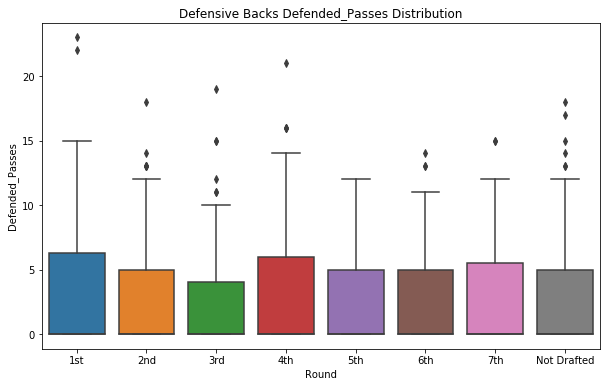

Defensive Backs Recovered_Fumbles Summary:
count   1101.00
mean       0.21
std        0.52
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: Recovered_Fumbles, dtype: float64
----------------------------------------
Defensive Backs Recovered_Fumbles by Round
             Recovered_Fumbles
Round                         
1st                       0.20
2nd                       0.19
3rd                       0.25
4th                       0.25
5th                       0.17
6th                       0.21
7th                       0.21
Not Drafted               0.21


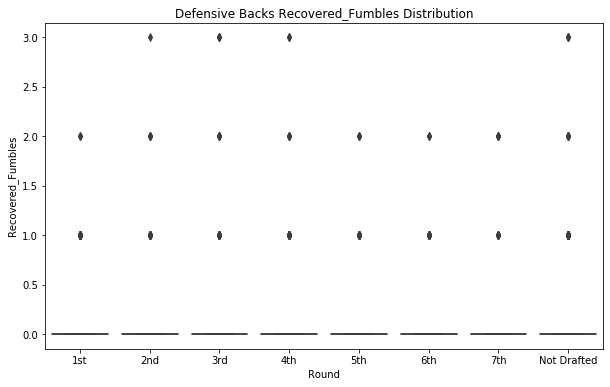

Defensive Backs Rec_Fumbles_Yds Summary:
count   1101.00
mean       2.01
std       10.54
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      111.00
Name: Rec_Fumbles_Yds, dtype: float64
----------------------------------------
Defensive Backs Rec_Fumbles_Yds by Round
             Rec_Fumbles_Yds
Round                       
1st                     1.77
2nd                     4.47
3rd                     2.98
4th                     0.88
5th                     1.73
6th                     1.85
7th                     1.85
Not Drafted             1.38


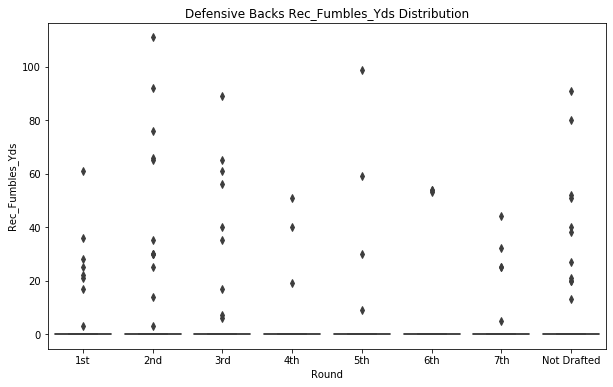

Defensive Backs Fumbles_Returned_TD Summary:
count   1101.00
mean       0.07
std        0.27
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.00
Name: Fumbles_Returned_TD, dtype: float64
----------------------------------------
Defensive Backs Fumbles_Returned_TD by Round
             Fumbles_Returned_TD
Round                           
1st                         0.07
2nd                         0.12
3rd                         0.09
4th                         0.06
5th                         0.05
6th                         0.06
7th                         0.11
Not Drafted                 0.05


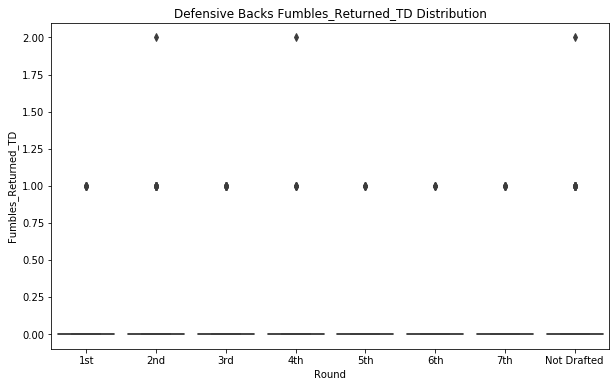

Defensive Backs Forced_Fumbles Summary:
count   1101.00
mean       0.34
std        0.84
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        7.00
Name: Forced_Fumbles, dtype: float64
----------------------------------------
Defensive Backs Forced_Fumbles by Round
             Forced_Fumbles
Round                      
1st                    0.32
2nd                    0.34
3rd                    0.35
4th                    0.32
5th                    0.39
6th                    0.29
7th                    0.52
Not Drafted            0.31


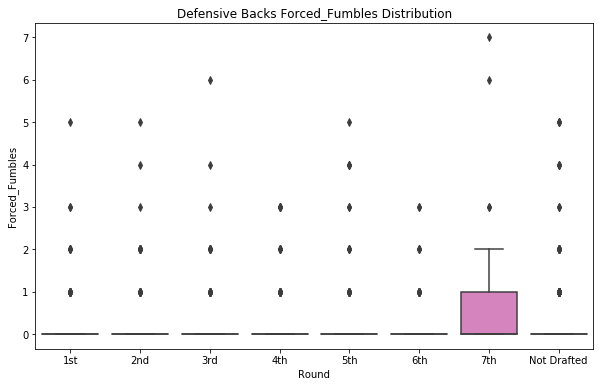

In [83]:
plot_stats('Defensive Backs', df, defense_stats)

### Defense Stats Hypothesis Tests

#### Solo Tackles

H0: The average number of solo tackles by players drafted are the same between rounds.

H1: The average number of solo tackles by players drafted are not the same between rounds.

#### Assisted Tackles

H0: The average number of assisted tackles by players drafted are the same between rounds.

H1: The average number of assisted tackles by players drafted are not the same between rounds.

#### Total Tackles

H0: The average number of total tackles by players drafted are the same between rounds.

H1: The average number of total tackles by players drafted are not the same between rounds.

#### Tackles for a Loss

H0: The average number of tackles for a loss by players drafted are the same between rounds.

H1: The average number of tackles for a loss by players drafted are not the same between rounds.

#### Sacks

H0: The average number of sacks by players drafted are the same between rounds.

H1: The average number of sacks by players drafted are not the same between rounds.

#### Interceptions

H0: The average number of interceptions by players drafted are the same between rounds.

H1: The average number of interceptions by players drafted are not the same between rounds.

#### Interceptions

H0: The average number of interceptions by players drafted are the same between rounds.

H1: The average number of interceptions by players drafted are not the same between rounds.

#### Interception Yards

H0: The average number of interception yards by players drafted are the same between rounds.

H1: The average number of interception yards by players drafted are not the same between rounds.

#### Yards per Interception

H0: The average number of yards per interception by players drafted are the same between rounds.

H1: The average number of yards per interception by players drafted are not the same between rounds.

#### Pick 6

H0: The average number of pick 6's by players drafted are the same between rounds.

H1: The average number of pick 6's by players drafted are not the same between rounds.

#### Interceptions

H0: The average number of interceptions by players drafted are the same between rounds.

H1: The average number of interceptions by players drafted are not the same between rounds.

#### Defended Passes

H0: The average number of defended passes by players drafted are the same between rounds.

H1: The average number of defended passes by players drafted are not the same between rounds.

#### Recovered Fumbles

H0: The average number of recovered fumbles by players drafted are the same between rounds.

H1: The average number of recovered fumbles by players drafted are not the same between rounds.

#### Recovered Fumble Yards

H0: The average number of recovered fumble yards by players drafted are the same between rounds.

H1: The average number of recovered fumble yards by players drafted are not the same between rounds.

#### TD from a Fumble

H0: The average number of touchdowns from a fumble by players drafted are the same between rounds.

H1: The average number of touchdowns from a fumble by players drafted are not the same between rounds.

#### Forced Fumbles

H0: The average number of forced fumbles by players drafted are the same between rounds.

H1: The average number of forced fumbles by players drafted are not the same between rounds.

In [84]:
for i in defense_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 40)

Defense_Games ANOVA Test:
----------------------------------------
              df  sum_sq  mean_sq    F  PR(>F)
Round       7.00   38.65     5.52 1.38    0.21
Residual 1093.00 4385.49     4.01  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.2527    0.9 -0.5188 1.0242  False
   1st         3rd  -0.0444    0.9 -0.8203 0.7314  False
   1st         4th   0.1307    0.9 -0.6467 0.9081  False
   1st         5th  -0.0035    0.9 -0.7991 0.7921  False
   1st         6th   -0.531 0.5541 -1.3876 0.3255  False
   1st         7th  -0.0038    0.9 -0.9145  0.907  False
   1st Not Drafted  -0.1279    0.9 -0.7766 0.5208  False
   2nd         3rd  -0.2972    0.9 -1.0591 0.4647  False
   2nd         4th   -0.122    0.9 -0.8855 0.6414  False
   2nd         5th  -0.2562    0.9 -1.0381 0.5257  False
   2nd         6th  -0.7837 0.0908 -1.6276 0.0601 

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.1118    0.9 -0.7565 0.5328  False
   1st         3rd  -0.2337    0.9 -0.8821 0.4146  False
   1st         4th   -0.149    0.9 -0.7986 0.5006  False
   1st         5th   -0.268    0.9 -0.9328 0.3968  False
   1st         6th  -0.3307 0.8401 -1.0465  0.385  False
   1st         7th    0.006    0.9 -0.7551  0.767  False
   1st Not Drafted  -0.2156    0.9 -0.7576 0.3265  False
   2nd         3rd  -0.1219    0.9 -0.7586 0.5148  False
   2nd         4th  -0.0372    0.9 -0.6751 0.6008  False
   2nd         5th  -0.1562    0.9 -0.8096 0.4972  False
   2nd         6th  -0.2189    0.9 -0.9241 0.4862  False
   2nd         7th   0.1178    0.9 -0.6333 0.8689  False
   2nd Not Drafted  -0.1038    0.9 -0.6318 0.4243  False
   3rd         4th   0.0847    0.9 -0.5569 0.7264  False
   3rd         5th  -0.0343    

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------
   1st         2nd  -0.0434    0.9 -0.2477  0.1609  False
   1st         3rd  -0.1698 0.1917 -0.3753  0.0356  False
   1st         4th   -0.128 0.5507 -0.3338  0.0778  False
   1st         5th  -0.1456 0.4185 -0.3563   0.065  False
   1st         6th  -0.2621  0.011 -0.4889 -0.0353   True
   1st         7th  -0.1606 0.4692 -0.4017  0.0806  False
   1st Not Drafted  -0.2176 0.0032 -0.3894 -0.0459   True
   2nd         3rd  -0.1264 0.5419 -0.3282  0.0753  False
   2nd         4th  -0.0846    0.9 -0.2867  0.1175  False
   2nd         5th  -0.1022 0.7829 -0.3092  0.1048  False
   2nd         6th  -0.2187 0.0604 -0.4421  0.0048  False
   2nd         7th  -0.1172 0.7855 -0.3551  0.1208  False
   2nd Not Drafted  -0.1742 0.0344 -0.3415 -0.0069   True
   3rd         4th   0.0418    0.9 -0.1615  0.2452  False
   3rd        

              df  sum_sq  mean_sq    F  PR(>F)
Round       7.00    3.40     0.49 0.69    0.68
Residual 1093.00  763.56     0.70  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd   0.0244    0.9 -0.2975 0.3463  False
   1st         3rd   0.0325    0.9 -0.2912 0.3563  False
   1st         4th   0.0033    0.9 -0.3211 0.3277  False
   1st         5th   0.0781    0.9 -0.2539   0.41  False
   1st         6th  -0.0293    0.9 -0.3867 0.3281  False
   1st         7th   0.2045 0.7026 -0.1756 0.5845  False
   1st Not Drafted  -0.0097    0.9 -0.2804  0.261  False
   2nd         3rd   0.0081    0.9 -0.3098  0.326  False
   2nd         4th  -0.0211    0.9 -0.3396 0.2975  False
   2nd         5th   0.0537    0.9 -0.2726 0.3799  False
   2nd         6th  -0.0537    0.9 -0.4059 0.2984  False
   2nd         7th     0.18 0.8077  -0.195 0.5551  False
   

### College Stats - Kicking

In [31]:
kicking_stats = ['Kicking_Games', 'XP_Made', 'XP_Attempts', 'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent', 
                 'TTL_Kicking_Points', 'NumPunts', 'Punt_Yds', 'Yds_per_Punt', 'XP_MadeperGame', 'XP_AttemptsperGame',
                 'FG_MadeperGame', 'FG_AttemptsperGame', 'TTL_Kicking_PointsperGame', 'NumPuntsperGame', 
                 'Punt_YdsperGame']

In [32]:
df[kicking_stats].describe()

,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Defensive Backs Kicking_Games Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: Kicking_Games, dtype: float64
----------------------------------------
Defensive Backs Kicking_Games by Round
             Kicking_Games
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.00
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


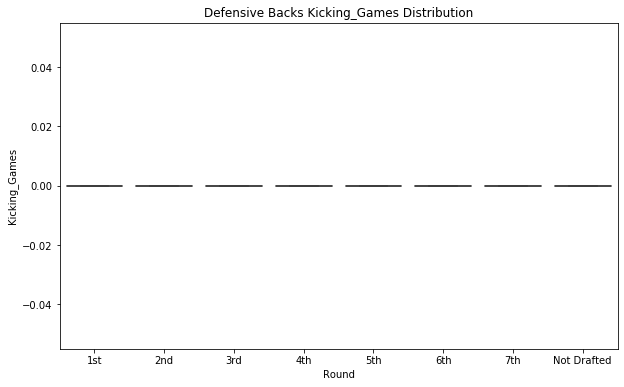

Defensive Backs XP_Made Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: XP_Made, dtype: float64
----------------------------------------
Defensive Backs XP_Made by Round
             XP_Made
Round               
1st             0.00
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


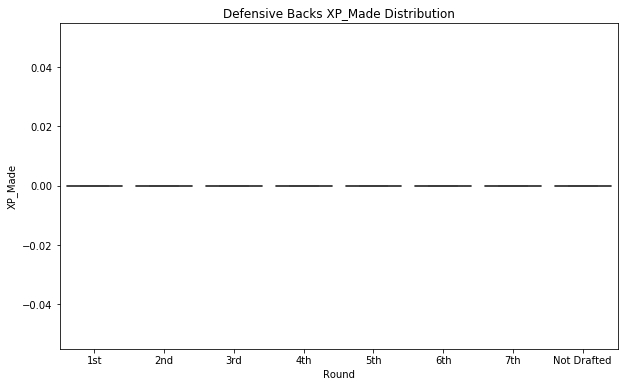

Defensive Backs XP_Attempts Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: XP_Attempts, dtype: float64
----------------------------------------
Defensive Backs XP_Attempts by Round
             XP_Attempts
Round                   
1st                 0.00
2nd                 0.00
3rd                 0.00
4th                 0.00
5th                 0.00
6th                 0.00
7th                 0.00
Not Drafted         0.00


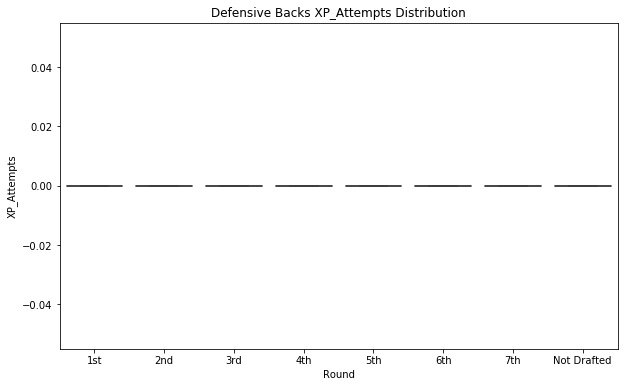

Defensive Backs XP_Percent Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: XP_Percent, dtype: float64
----------------------------------------
Defensive Backs XP_Percent by Round
             XP_Percent
Round                  
1st                0.00
2nd                0.00
3rd                0.00
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


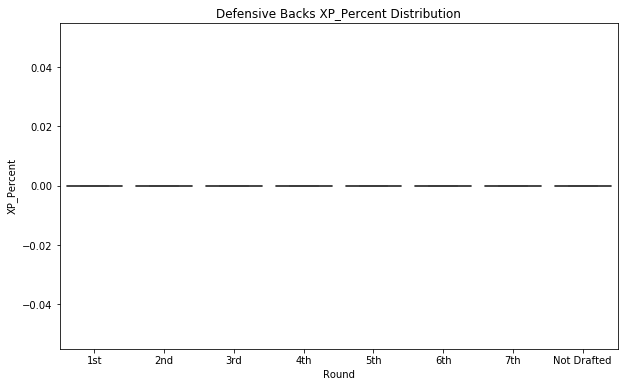

Defensive Backs FG_Made Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: FG_Made, dtype: float64
----------------------------------------
Defensive Backs FG_Made by Round
             FG_Made
Round               
1st             0.00
2nd             0.00
3rd             0.00
4th             0.00
5th             0.00
6th             0.00
7th             0.00
Not Drafted     0.00


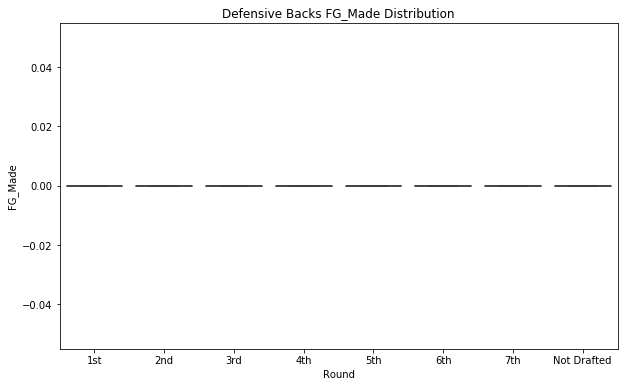

Defensive Backs FG_Attempts Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: FG_Attempts, dtype: float64
----------------------------------------
Defensive Backs FG_Attempts by Round
             FG_Attempts
Round                   
1st                 0.00
2nd                 0.00
3rd                 0.00
4th                 0.00
5th                 0.00
6th                 0.00
7th                 0.00
Not Drafted         0.00


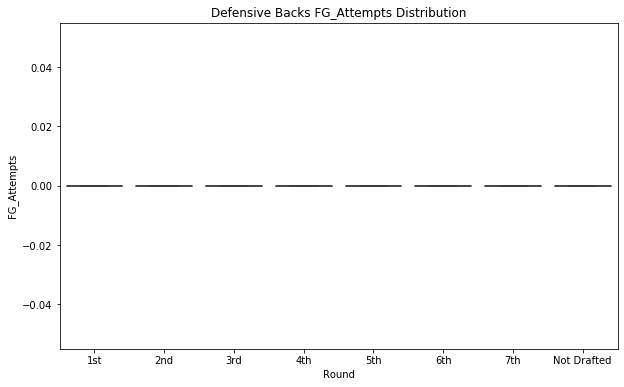

Defensive Backs FG_Percent Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: FG_Percent, dtype: float64
----------------------------------------
Defensive Backs FG_Percent by Round
             FG_Percent
Round                  
1st                0.00
2nd                0.00
3rd                0.00
4th                0.00
5th                0.00
6th                0.00
7th                0.00
Not Drafted        0.00


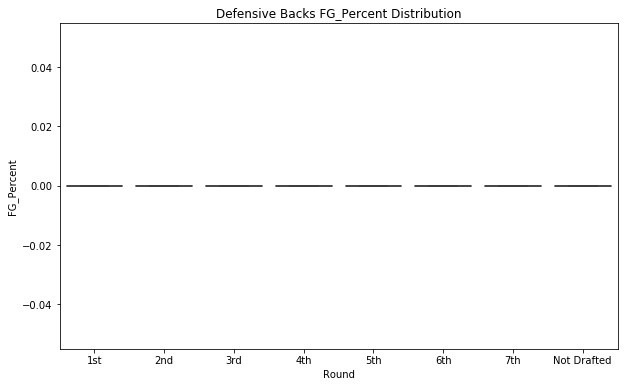

Defensive Backs TTL_Kicking_Points Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TTL_Kicking_Points, dtype: float64
----------------------------------------
Defensive Backs TTL_Kicking_Points by Round
             TTL_Kicking_Points
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


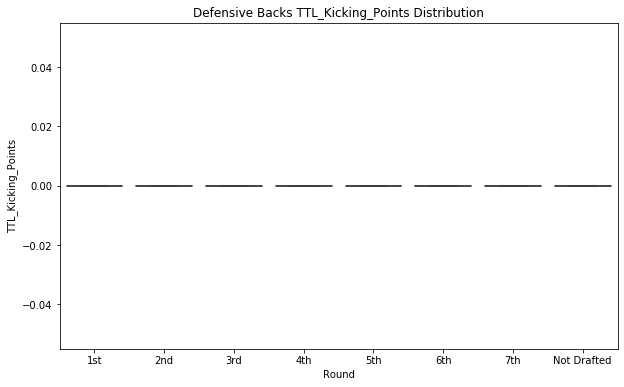

Defensive Backs NumPunts Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: NumPunts, dtype: float64
----------------------------------------
Defensive Backs NumPunts by Round
             NumPunts
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


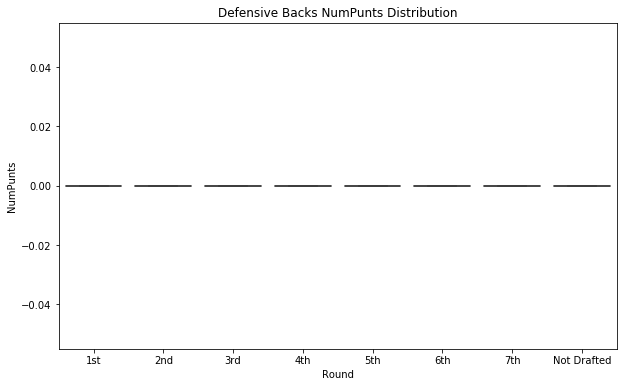

Defensive Backs Punt_Yds Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: Punt_Yds, dtype: float64
----------------------------------------
Defensive Backs Punt_Yds by Round
             Punt_Yds
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


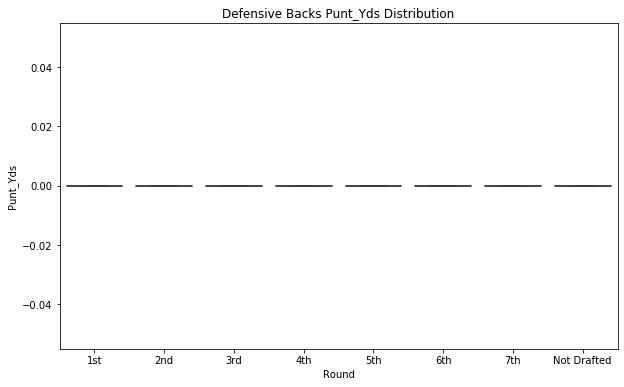

Defensive Backs Yds_per_Punt Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: Yds_per_Punt, dtype: float64
----------------------------------------
Defensive Backs Yds_per_Punt by Round
             Yds_per_Punt
Round                    
1st                  0.00
2nd                  0.00
3rd                  0.00
4th                  0.00
5th                  0.00
6th                  0.00
7th                  0.00
Not Drafted          0.00


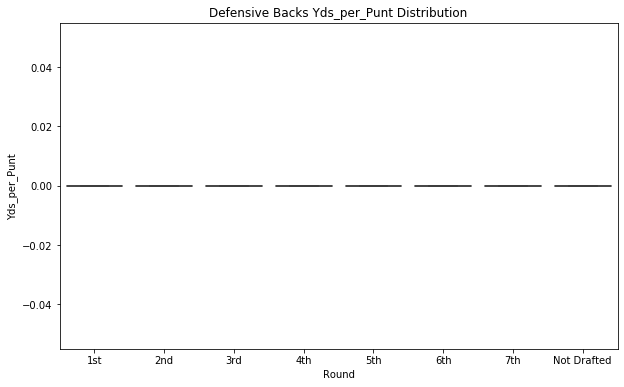

Defensive Backs XP_MadeperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: XP_MadeperGame, dtype: float64
----------------------------------------
Defensive Backs XP_MadeperGame by Round
             XP_MadeperGame
Round                      
1st                    0.00
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


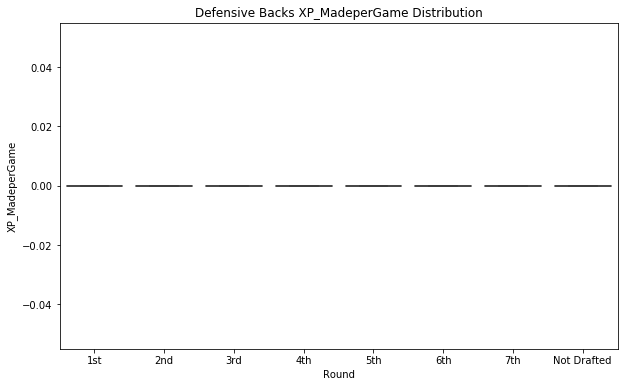

Defensive Backs XP_AttemptsperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: XP_AttemptsperGame, dtype: float64
----------------------------------------
Defensive Backs XP_AttemptsperGame by Round
             XP_AttemptsperGame
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


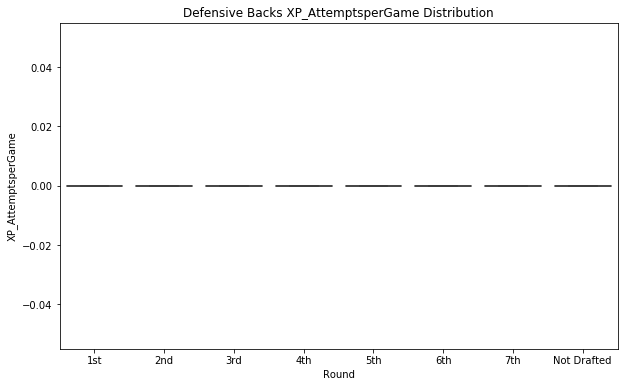

Defensive Backs FG_MadeperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: FG_MadeperGame, dtype: float64
----------------------------------------
Defensive Backs FG_MadeperGame by Round
             FG_MadeperGame
Round                      
1st                    0.00
2nd                    0.00
3rd                    0.00
4th                    0.00
5th                    0.00
6th                    0.00
7th                    0.00
Not Drafted            0.00


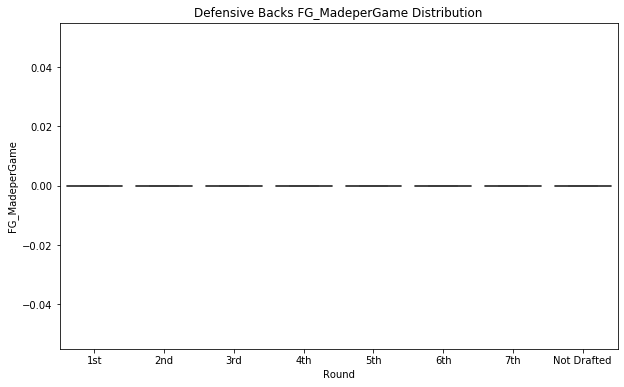

Defensive Backs FG_AttemptsperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: FG_AttemptsperGame, dtype: float64
----------------------------------------
Defensive Backs FG_AttemptsperGame by Round
             FG_AttemptsperGame
Round                          
1st                        0.00
2nd                        0.00
3rd                        0.00
4th                        0.00
5th                        0.00
6th                        0.00
7th                        0.00
Not Drafted                0.00


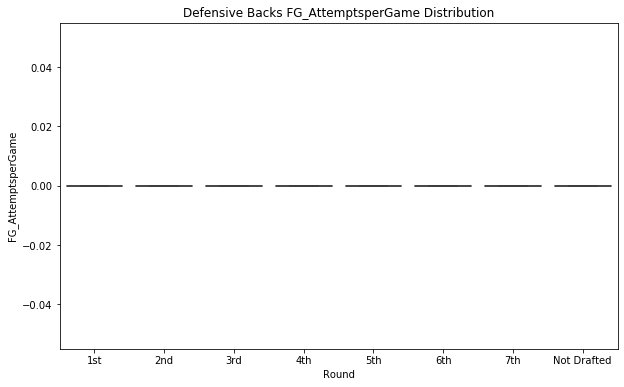

Defensive Backs TTL_Kicking_PointsperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TTL_Kicking_PointsperGame, dtype: float64
----------------------------------------
Defensive Backs TTL_Kicking_PointsperGame by Round
             TTL_Kicking_PointsperGame
Round                                 
1st                               0.00
2nd                               0.00
3rd                               0.00
4th                               0.00
5th                               0.00
6th                               0.00
7th                               0.00
Not Drafted                       0.00


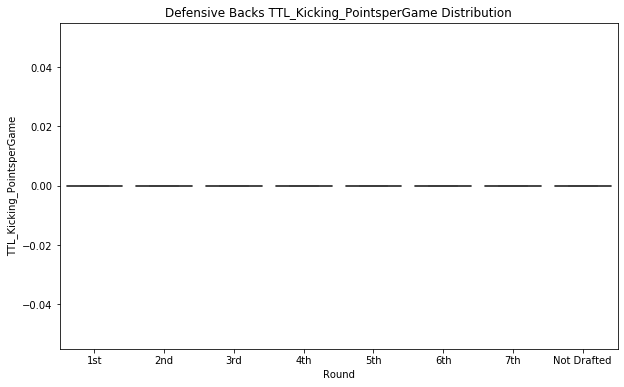

Defensive Backs NumPuntsperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: NumPuntsperGame, dtype: float64
----------------------------------------
Defensive Backs NumPuntsperGame by Round
             NumPuntsperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


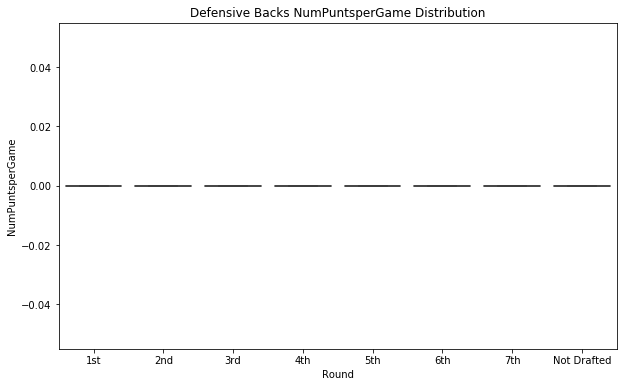

Defensive Backs Punt_YdsperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: Punt_YdsperGame, dtype: float64
----------------------------------------
Defensive Backs Punt_YdsperGame by Round
             Punt_YdsperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


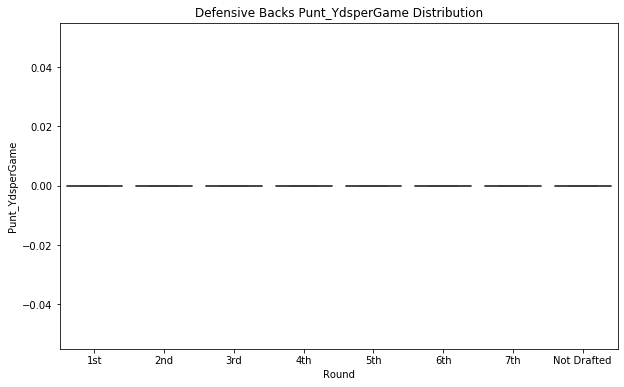

In [33]:
plot_stats('Defensive Backs', df, kicking_stats)

In [34]:
for i in kicking_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 40)

Kicking_Games ANOVA Test:
----------------------------------------
              df  sum_sq  mean_sq   F  PR(>F)
Round       7.00    0.00     0.00 nan     nan
Residual 1093.00    0.00     0.00 nan     nan


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  Fal


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0

### College Stats - Punt Returns

In [35]:
puntret_stats = ['PuntRet_Games', 'Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return', 'KO_Returned_for_TD', 
                 'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame', 'KO_Returned_for_TDperGame']

In [36]:
df[puntret_stats].describe()

,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,3.37,0.32,7.59,1.26,0.00,0.03,0.63,0.00
std,5.48,2.07,54.17,5.45,0.08,0.17,4.49,0.01
min,0.00,0.00,-8.00,-8.00,0.00,0.00,-0.62,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,15.00,33.00,782.00,41.00,2.00,2.75,63.75,0.17


Defensive Backs PuntRet_Games Summary:
count   1101.00
mean       3.37
std        5.48
min        0.00
25%        0.00
50%        0.00
75%       11.00
max       15.00
Name: PuntRet_Games, dtype: float64
----------------------------------------
Defensive Backs PuntRet_Games by Round
             PuntRet_Games
Round                     
1st                   4.48
2nd                   3.11
3rd                   3.32
4th                   3.32
5th                   3.39
6th                   3.41
7th                   3.24
Not Drafted           3.13


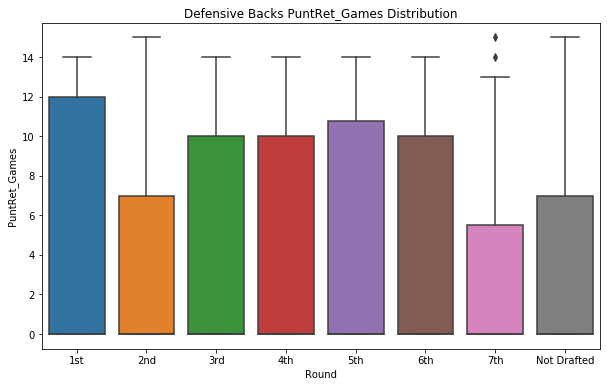

Defensive Backs Kickoff_Returns Summary:
count   1101.00
mean       0.32
std        2.07
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       33.00
Name: Kickoff_Returns, dtype: float64
----------------------------------------
Defensive Backs Kickoff_Returns by Round
             Kickoff_Returns
Round                       
1st                     0.80
2nd                     0.32
3rd                     0.12
4th                     0.28
5th                     0.42
6th                     0.54
7th                     0.30
Not Drafted             0.13


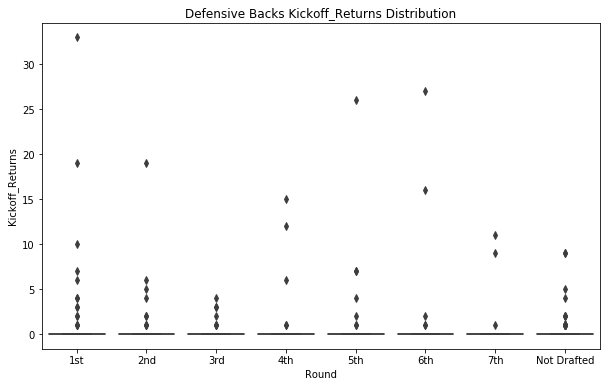

Defensive Backs KO_Return_Yds Summary:
count   1101.00
mean       7.59
std       54.17
min       -8.00
25%        0.00
50%        0.00
75%        0.00
max      782.00
Name: KO_Return_Yds, dtype: float64
----------------------------------------
Defensive Backs KO_Return_Yds by Round
             KO_Return_Yds
Round                     
1st                  20.13
2nd                   8.02
3rd                   2.36
4th                   7.55
5th                   9.81
6th                  13.63
7th                   7.20
Not Drafted           2.58


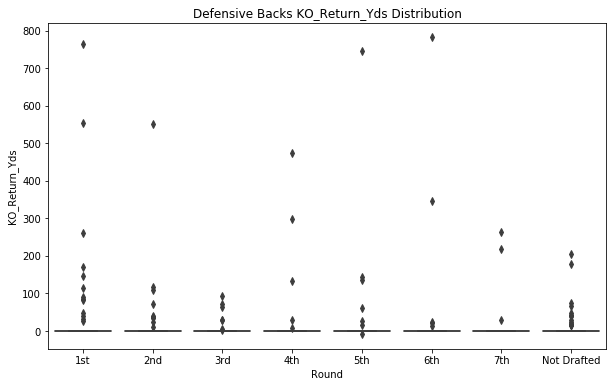

Defensive Backs Yds_per_KO_Return Summary:
count   1101.00
mean       1.26
std        5.45
min       -8.00
25%        0.00
50%        0.00
75%        0.00
max       41.00
Name: Yds_per_KO_Return, dtype: float64
----------------------------------------
Defensive Backs Yds_per_KO_Return by Round
             Yds_per_KO_Return
Round                         
1st                       2.86
2nd                       1.56
3rd                       0.95
4th                       0.93
5th                       0.92
6th                       1.11
7th                       1.07
Not Drafted               1.01


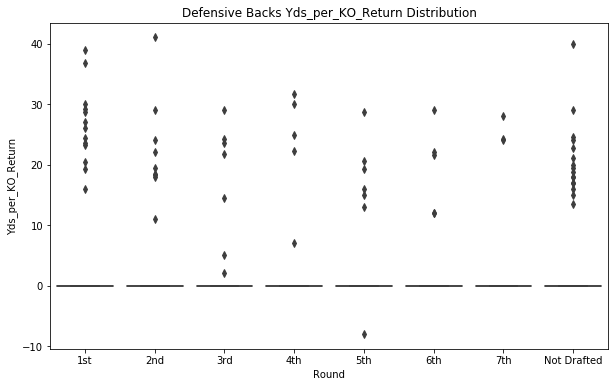

Defensive Backs KO_Returned_for_TD Summary:
count   1101.00
mean       0.00
std        0.08
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.00
Name: KO_Returned_for_TD, dtype: float64
----------------------------------------
Defensive Backs KO_Returned_for_TD by Round
             KO_Returned_for_TD
Round                          
1st                        0.01
2nd                        0.00
3rd                        0.00
4th                        0.02
5th                        0.02
6th                        0.00
7th                        0.00
Not Drafted                0.00


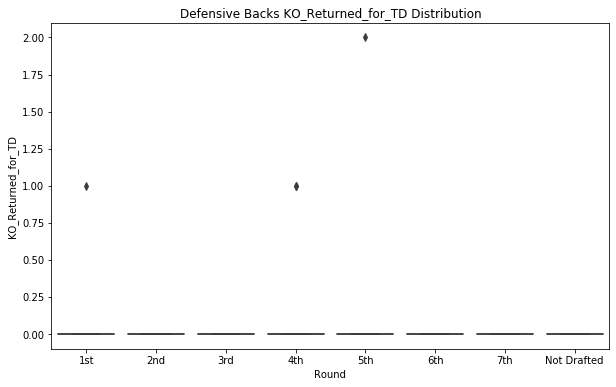

Defensive Backs Kickoff_ReturnsperGame Summary:
count   1101.00
mean       0.03
std        0.17
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        2.75
Name: Kickoff_ReturnsperGame, dtype: float64
----------------------------------------
Defensive Backs Kickoff_ReturnsperGame by Round
             Kickoff_ReturnsperGame
Round                              
1st                            0.07
2nd                            0.02
3rd                            0.01
4th                            0.03
5th                            0.03
6th                            0.04
7th                            0.02
Not Drafted                    0.01


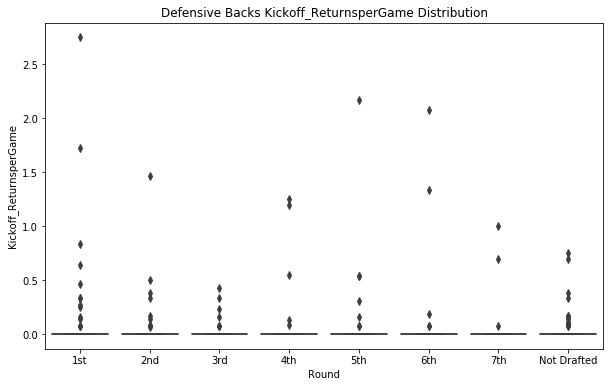

Defensive Backs KO_Return_YdsperGame Summary:
count   1101.00
mean       0.63
std        4.49
min       -0.62
25%        0.00
50%        0.00
75%        0.00
max       63.75
Name: KO_Return_YdsperGame, dtype: float64
----------------------------------------
Defensive Backs KO_Return_YdsperGame by Round
             KO_Return_YdsperGame
Round                            
1st                          1.71
2nd                          0.63
3rd                          0.22
4th                          0.68
5th                          0.80
6th                          1.08
7th                          0.61
Not Drafted                  0.21


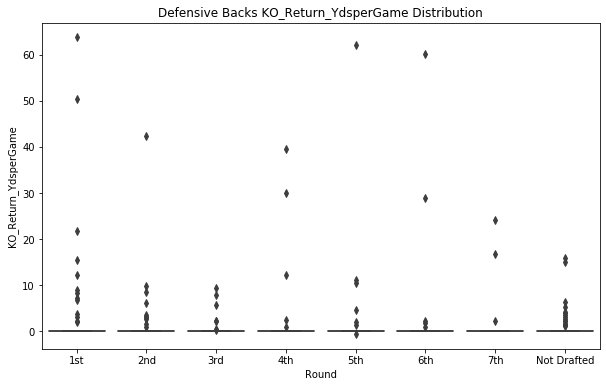

Defensive Backs KO_Returned_for_TDperGame Summary:
count   1101.00
mean       0.00
std        0.01
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.17
Name: KO_Returned_for_TDperGame, dtype: float64
----------------------------------------
Defensive Backs KO_Returned_for_TDperGame by Round
             KO_Returned_for_TDperGame
Round                                 
1st                               0.00
2nd                               0.00
3rd                               0.00
4th                               0.00
5th                               0.00
6th                               0.00
7th                               0.00
Not Drafted                       0.00


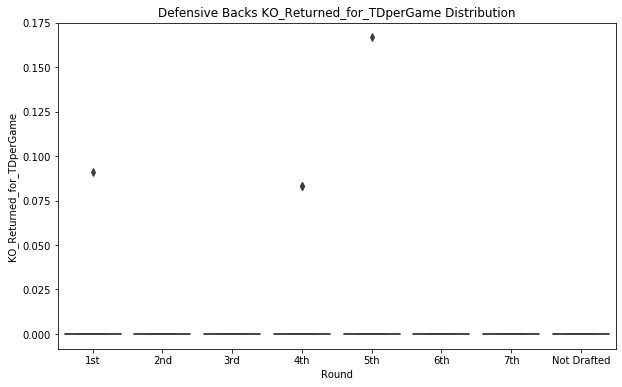

In [37]:
plot_stats('Defensive Backs', df, puntret_stats)

In [38]:
for i in puntret_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df,  i)
    print('')
    print('*' * 40)

PuntRet_Games ANOVA Test:
----------------------------------------
              df   sum_sq  mean_sq    F  PR(>F)
Round       7.00   178.97    25.57 0.85    0.54
Residual 1093.00 32806.86    30.02  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -1.3748 0.4968 -3.4849 0.7353  False
   1st         3rd  -1.1659  0.682  -3.288 0.9563  False
   1st         4th  -1.1633 0.6861 -3.2896 0.9629  False
   1st         5th  -1.0886 0.7709 -3.2645 1.0873  False
   1st         6th  -1.0695 0.8502 -3.4122 1.2732  False
   1st         7th  -1.2439 0.7726 -3.7349 1.2471  False
   1st Not Drafted  -1.3557 0.2834 -3.1299 0.4186  False
   2nd         3rd   0.2089    0.9 -1.8749 2.2928  False
   2nd         4th   0.2115    0.9 -1.8766 2.2996  False
   2nd         5th   0.2862    0.9 -1.8524 2.4249  False
   2nd         6th   0.3053    0.9 -2.0028 2.61

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.0083    0.9  -0.039 0.0223  False
   1st         3rd  -0.0083    0.9 -0.0392 0.0225  False
   1st         4th   0.0077    0.9 -0.0232 0.0386  False
   1st         5th   0.0092    0.9 -0.0224 0.0408  False
   1st         6th  -0.0083    0.9 -0.0424 0.0257  False
   1st         7th  -0.0083    0.9 -0.0445 0.0279  False
   1st Not Drafted  -0.0083    0.9 -0.0341 0.0174  False
   2nd         3rd      0.0    0.9 -0.0303 0.0303  False
   2nd         4th    0.016 0.7218 -0.0143 0.0463  False
   2nd         5th   0.0175 0.6544 -0.0135 0.0486  False
   2nd         6th      0.0    0.9 -0.0335 0.0335  False
   2nd         7th      0.0    0.9 -0.0357 0.0357  False
   2nd Not Drafted      0.0    0.9 -0.0251 0.0251  False
   3rd         4th    0.016 0.7273 -0.0145 0.0465  False
   3rd         5th   0.0175   0

### College Stats - Scoring

In [39]:
scoring_stats = ['Scoring_Games', 'TD_Other', 'Ttl_TDs', 'TwoPT_Conversion', 'Safety', 'TTL_Points', 'TD_OtherperGame',
                 'Ttl_TDsperGame', 'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame']

In [40]:
df[scoring_stats].describe()

,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame
count,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00,1101.00
mean,6.80,0.00,0.45,0.00,0.00,2.71,0.00,0.04,0.00,0.00,0.22
std,6.09,0.00,0.90,0.00,0.00,5.40,0.00,0.07,0.00,0.00,0.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,12.00,0.00,1.00,0.00,0.00,6.00,0.00,0.08,0.00,0.00,0.46
max,15.00,0.00,11.00,0.00,0.00,66.00,0.00,0.85,0.00,0.00,5.08


Defensive Backs Scoring_Games Summary:
count   1101.00
mean       6.80
std        6.09
min        0.00
25%        0.00
50%       11.00
75%       12.00
max       15.00
Name: Scoring_Games, dtype: float64
----------------------------------------
Defensive Backs Scoring_Games by Round
             Scoring_Games
Round                     
1st                   8.03
2nd                   7.17
3rd                   7.06
4th                   6.58
5th                   6.51
6th                   5.92
7th                   7.39
Not Drafted           6.39


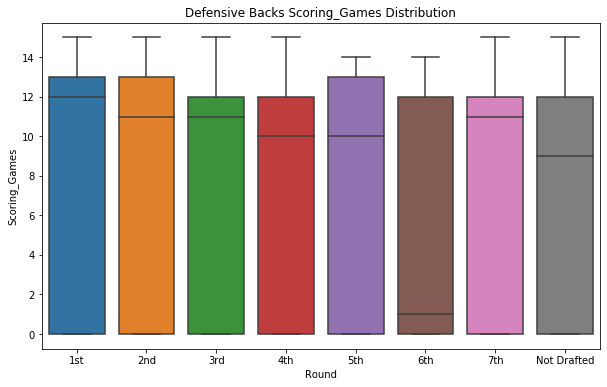

Defensive Backs TD_Other Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TD_Other, dtype: float64
----------------------------------------
Defensive Backs TD_Other by Round
             TD_Other
Round                
1st              0.00
2nd              0.00
3rd              0.00
4th              0.00
5th              0.00
6th              0.00
7th              0.00
Not Drafted      0.00


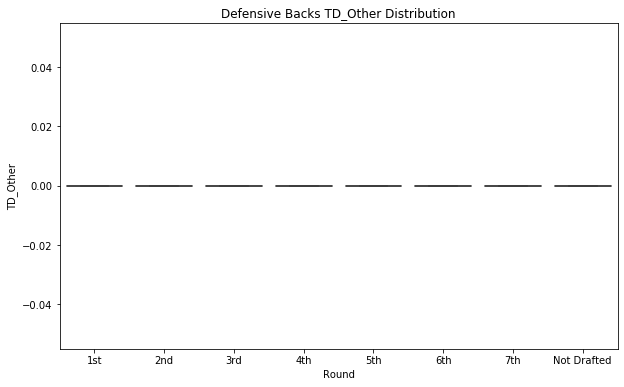

Defensive Backs Ttl_TDs Summary:
count   1101.00
mean       0.45
std        0.90
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       11.00
Name: Ttl_TDs, dtype: float64
----------------------------------------
Defensive Backs Ttl_TDs by Round
             Ttl_TDs
Round               
1st             0.88
2nd             0.62
3rd             0.38
4th             0.54
5th             0.39
6th             0.21
7th             0.39
Not Drafted     0.33


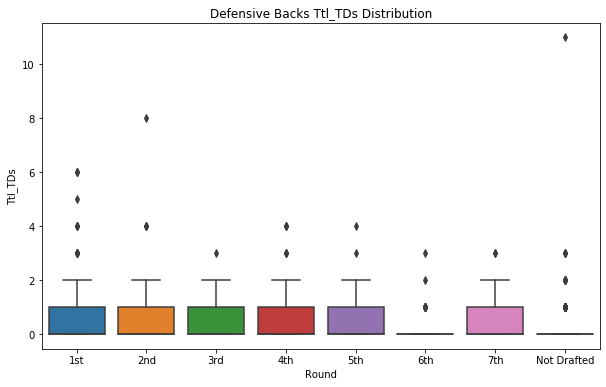

Defensive Backs TwoPT_Conversion Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TwoPT_Conversion, dtype: float64
----------------------------------------
Defensive Backs TwoPT_Conversion by Round
             TwoPT_Conversion
Round                        
1st                      0.00
2nd                      0.00
3rd                      0.00
4th                      0.00
5th                      0.00
6th                      0.00
7th                      0.00
Not Drafted              0.00


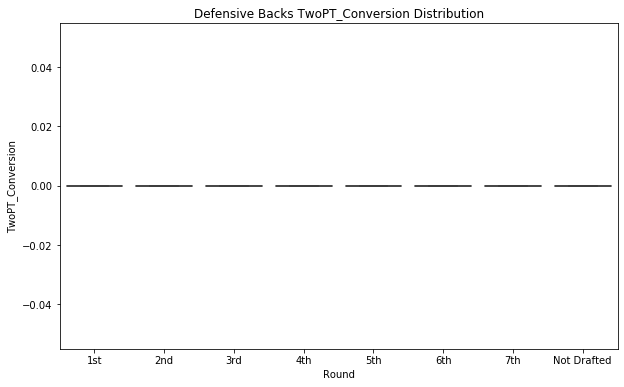

Defensive Backs Safety Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: Safety, dtype: float64
----------------------------------------
Defensive Backs Safety by Round
             Safety
Round              
1st            0.00
2nd            0.00
3rd            0.00
4th            0.00
5th            0.00
6th            0.00
7th            0.00
Not Drafted    0.00


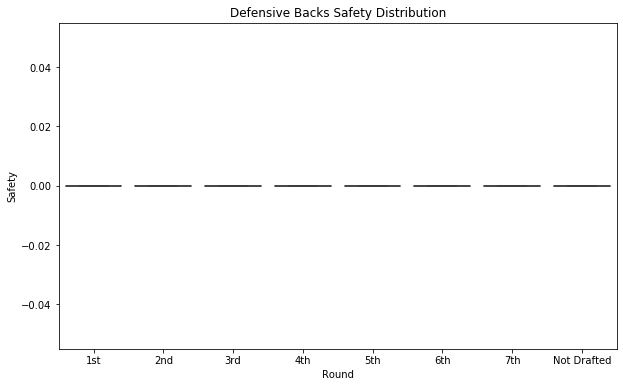

Defensive Backs TTL_Points Summary:
count   1101.00
mean       2.71
std        5.40
min        0.00
25%        0.00
50%        0.00
75%        6.00
max       66.00
Name: TTL_Points, dtype: float64
----------------------------------------
Defensive Backs TTL_Points by Round
             TTL_Points
Round                  
1st                5.25
2nd                3.72
3rd                2.29
4th                3.26
5th                2.32
6th                1.24
7th                2.37
Not Drafted        1.93


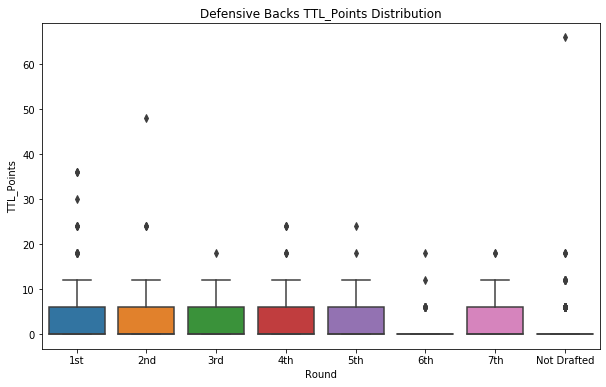

Defensive Backs TD_OtherperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TD_OtherperGame, dtype: float64
----------------------------------------
Defensive Backs TD_OtherperGame by Round
             TD_OtherperGame
Round                       
1st                     0.00
2nd                     0.00
3rd                     0.00
4th                     0.00
5th                     0.00
6th                     0.00
7th                     0.00
Not Drafted             0.00


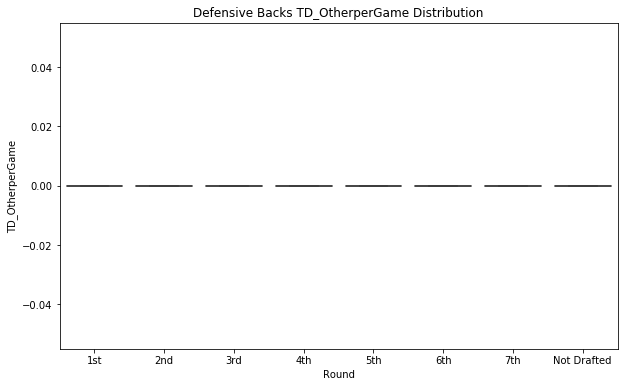

Defensive Backs Ttl_TDsperGame Summary:
count   1101.00
mean       0.04
std        0.07
min        0.00
25%        0.00
50%        0.00
75%        0.08
max        0.85
Name: Ttl_TDsperGame, dtype: float64
----------------------------------------
Defensive Backs Ttl_TDsperGame by Round
             Ttl_TDsperGame
Round                      
1st                    0.07
2nd                    0.05
3rd                    0.03
4th                    0.05
5th                    0.03
6th                    0.02
7th                    0.03
Not Drafted            0.03


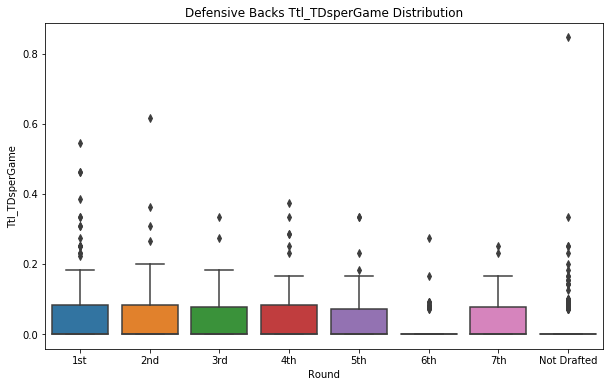

Defensive Backs TwoPT_ConversionperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: TwoPT_ConversionperGame, dtype: float64
----------------------------------------
Defensive Backs TwoPT_ConversionperGame by Round
             TwoPT_ConversionperGame
Round                               
1st                             0.00
2nd                             0.00
3rd                             0.00
4th                             0.00
5th                             0.00
6th                             0.00
7th                             0.00
Not Drafted                     0.00


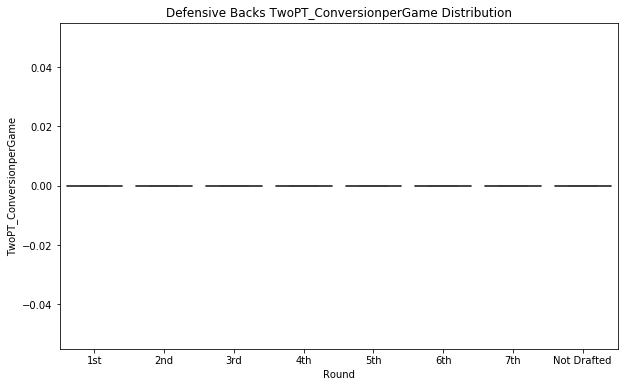

Defensive Backs SafetyperGame Summary:
count   1101.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: SafetyperGame, dtype: float64
----------------------------------------
Defensive Backs SafetyperGame by Round
             SafetyperGame
Round                     
1st                   0.00
2nd                   0.00
3rd                   0.00
4th                   0.00
5th                   0.00
6th                   0.00
7th                   0.00
Not Drafted           0.00


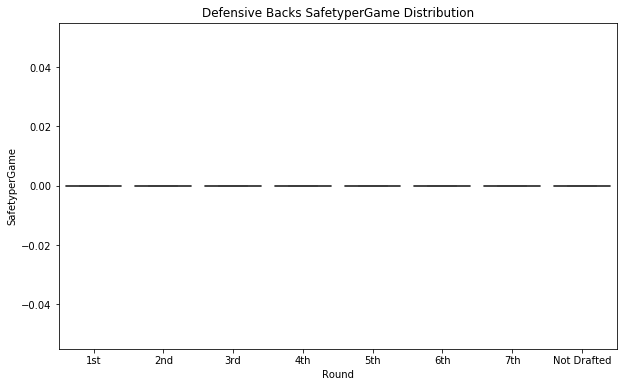

Defensive Backs TTL_PointsperGame Summary:
count   1101.00
mean       0.22
std        0.45
min        0.00
25%        0.00
50%        0.00
75%        0.46
max        5.08
Name: TTL_PointsperGame, dtype: float64
----------------------------------------
Defensive Backs TTL_PointsperGame by Round
             TTL_PointsperGame
Round                         
1st                       0.43
2nd                       0.30
3rd                       0.20
4th                       0.27
5th                       0.20
6th                       0.10
7th                       0.19
Not Drafted               0.16


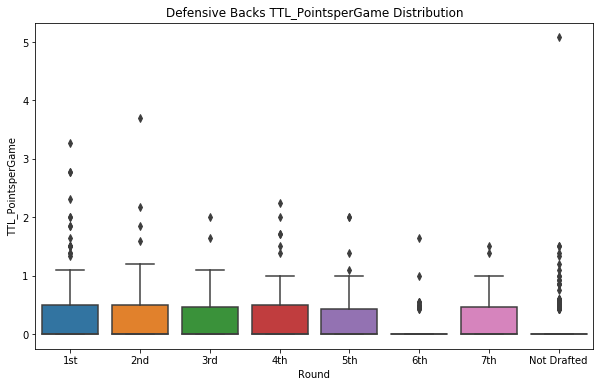

In [41]:
plot_stats('Defensive Backs', df, scoring_stats)

In [42]:
for i in scoring_stats:
    print(i + ' ANOVA Test:')
    print('-' * 40)
    anova_tukey('Defensive Backs', df, i)
    print('')
    print('*' * 40)

Scoring_Games ANOVA Test:
----------------------------------------
              df   sum_sq  mean_sq    F  PR(>F)
Round       7.00   373.31    53.33 1.44    0.19
Residual 1093.00 40467.12    37.02  nan     nan

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   1st         2nd  -0.8628    0.9 -3.2063 1.4807  False
   1st         3rd  -0.9778    0.9 -3.3347 1.3791  False
   1st         4th  -1.4573 0.5593 -3.8188 0.9042  False
   1st         5th  -1.5246 0.5344 -3.9412 0.8921  False
   1st         6th  -2.1138 0.2107 -4.7157 0.4881  False
   1st         7th   -0.639    0.9 -3.4056 2.1276  False
   1st Not Drafted  -1.6473 0.1801 -3.6179 0.3232  False
   2nd         3rd   -0.115    0.9 -2.4294 2.1994  False
   2nd         4th  -0.5945    0.9 -2.9136 1.7246  False
   2nd         5th  -0.6618    0.9  -3.037 1.7135  False
   2nd         6th   -1.251 0.7932 -3.8144 1.31

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  Fals

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1    group2   meandiff p-adj  lower upper reject
-----------------------------------------------------
   1st         2nd      0.0 0.5566   0.0   0.0  False
   1st         3rd      0.0 0.5566   0.0   0.0  False
   1st         4th      0.0 0.5566   0.0   0.0  False
   1st         5th      0.0 0.5566   0.0   0.0  False
   1st         6th     

In [ ]:
features_to_use = ['_40yd', '_3Cone', ]